In [32]:
!pip install opencage
!pip install folium
!pip install wordcloud
!pip install yellowbrick
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
from folium.plugins import HeatMap
from opencage.geocoder import OpenCageGeocode
from wordcloud import WordCloud

#Preprocessing Libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# ML Libraries
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Evaluation Metrics
from yellowbrick.classifier import ClassBalance, ROCAUC, ClassificationReport, ClassPredictionError
from sklearn import metrics



In [47]:
df = pd.read_csv(r'C:\Users\user\Downloads\RMS_Crime_Incidents.csv', index_col=None)

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (8,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [48]:
df.head(5)

X          Y  crime_id  report_number                     address  \
0 -83.112285  42.349950   3021416     1702040249     Scotten St & Milford St   
1 -82.940962  42.402000   3043502     1703280213   Bedford St & E Warren Ave   
2 -83.037944  42.342367   3051611     1704160245       Russell St & Maple St   
3 -83.234482  42.442283   3053917     1704220135  Hessel Ave & Huntington Rd   
4 -82.938813  42.359723   3054365     1704230259     Scripps St & Newport St   

  offense_description offense_category  state_offense_code arrest_charge  \
0             ROBBERY          ROBBERY                1201         12000   
1             ROBBERY          ROBBERY                1201         12000   
2             ROBBERY          ROBBERY                1201         12000   
3             ROBBERY          ROBBERY                1201         12000   
4     LARCENY - OTHER          LARCENY                2307         23007   

  charge_description  ...  year scout_car_area  precinct      block_id  \
0            ROBBERY  ...  2017           1009        10  2.616350e+14   
1            ROBBERY  ...  2017            504         5  2.616350e+14   
2            ROBBERY  ...  2017            709         7  2.616350e+14   
3            ROBBERY  ...  2017            803         8  2.616350e+14   
4    LARCENY - OTHER  ...  2017            512         5  2.616350e+14   

         neighborhood council_district zip_code  longitude   latitude  oid  
0             Midwest                5    48210 -83.112285  42.349950    1  
1         Morningside                4    48224 -82.940962  42.402000    2  
2      Lafayette Park                5    48207 -83.037944  42.342367    3  
3         O'Hair Park                1    48219 -83.234482  42.442283    4  
4  Jefferson Chalmers                4    48215 -82.938813  42.359723    5  

[5 rows x 24 columns]

In [21]:
df.describe().T

count          mean           std           min  \
X                   314854.0 -8.310865e+01  9.765139e-02 -8.328778e+01   
Y                   314854.0  4.238956e+01  3.793998e-02  4.225551e+01   
crime_id            314854.0  3.287128e+06  1.638668e+05  3.000004e+06   
report_number       314854.0  1.843601e+09  1.115237e+08  1.000000e+00   
state_offense_code  314854.0  2.363843e+03  1.130816e+03  9.010000e+02   
day_of_week         314854.0  3.992984e+00  1.993017e+00  1.000000e+00   
hour_of_day         314854.0  1.162371e+01  7.511412e+00  0.000000e+00   
year                314854.0  2.018342e+03  1.135644e+00  2.013000e+03   
block_id            314854.0  2.616350e+14  3.359916e+08  2.616350e+14   
council_district    314854.0  3.998663e+00  2.039507e+00  1.000000e+00   
zip_code            314854.0  4.821902e+04  1.130142e+01  4.820100e+04   
longitude           314854.0 -8.310865e+01  9.765139e-02 -8.328778e+01   
latitude            314854.0  4.238956e+01  3.793998e-02  4.225551e+01   
oid                 314854.0  1.577600e+05  9.106428e+04  1.000000e+00   

                             25%           50%           75%           max  
X                  -8.319524e+01 -8.311718e+01 -8.302756e+01 -8.291030e+01  
Y                   4.235912e+01  4.239421e+01  4.242228e+01  4.245050e+01  
crime_id            3.147784e+06  3.288107e+06  3.424026e+06  3.583763e+06  
report_number       1.711230e+09  1.811100e+09  1.910160e+09  2.091800e+09  
state_offense_code  1.302000e+03  2.305000e+03  2.900000e+03  9.915000e+03  
day_of_week         2.000000e+00  4.000000e+00  6.000000e+00  7.000000e+00  
hour_of_day         4.000000e+00  1.300000e+01  1.800000e+01  2.300000e+01  
year                2.017000e+03  2.018000e+03  2.019000e+03  2.020000e+03  
block_id            2.616350e+14  2.616350e+14  2.616350e+14  2.616400e+14  
council_district    2.000000e+00  4.000000e+00  6.000000e+00  7.000000e+00  
zip_code            4.820800e+04  4.821900e+04  4.822800e+04  4.824300e+04  
longitude          -8.319524e+01 -8.311718e+01 -8.302756e+01 -8.291030e+01  
latitude            4.235912e+01  4.239421e+01  4.242228e+01  4.245050e+01  
oid                 7.887925e+04  1.577375e+05  2.366138e+05  3.155000e+05

In [22]:
df.dtypes

X                      float64
Y                      float64
crime_id                 int64
report_number            int64
address                 object
offense_description     object
offense_category        object
state_offense_code       int64
arrest_charge           object
charge_description      object
incident_timestamp      object
incident_time           object
day_of_week              int64
hour_of_day              int64
year                     int64
scout_car_area          object
precinct                object
block_id               float64
neighborhood            object
council_district         int64
zip_code                 int64
longitude              float64
latitude               float64
oid                      int64
dtype: object

In [23]:
df.shape

(314854, 24)

In [49]:
df.drop(['crime_id','report_number','X','Y','oid','charge_description'], axis=1, inplace=True)

In [50]:
df.head()

address offense_description offense_category  \
0     Scotten St & Milford St             ROBBERY          ROBBERY   
1   Bedford St & E Warren Ave             ROBBERY          ROBBERY   
2       Russell St & Maple St             ROBBERY          ROBBERY   
3  Hessel Ave & Huntington Rd             ROBBERY          ROBBERY   
4     Scripps St & Newport St     LARCENY - OTHER          LARCENY   

   state_offense_code arrest_charge      incident_timestamp incident_time  \
0                1201         12000  2017/02/05 04:00:00+00      23:00:00   
1                1201         12000  2017/03/24 16:51:00+00      12:51:00   
2                1201         12000  2017/04/17 00:02:00+00      20:02:00   
3                1201         12000  2017/04/21 08:10:00+00       4:10:00   
4                2307         23007  2017/04/23 20:14:00+00      16:14:00   

   day_of_week  hour_of_day  year scout_car_area precinct      block_id  \
0            6           23  2017           1009       10  2.616350e+14   
1            5           12  2017            504        5  2.616350e+14   
2            7           20  2017            709        7  2.616350e+14   
3            5            4  2017            803        8  2.616350e+14   
4            7           16  2017            512        5  2.616350e+14   

         neighborhood  council_district  zip_code  longitude   latitude  
0             Midwest                 5     48210 -83.112285  42.349950  
1         Morningside                 4     48224 -82.940962  42.402000  
2      Lafayette Park                 5     48207 -83.037944  42.342367  
3         O'Hair Park                 1     48219 -83.234482  42.442283  
4  Jefferson Chalmers                 4     48215 -82.938813  42.359723

In [51]:
df.columns = ['Address','Description','Offense','Offense_code','Arrest_Charge','Incident_timestamp','Time','Day','Hour','Year','Scout_car_area','Precinct','Block_id','Neighborhood','Council_dist','Zip','Long','Lat']
df.head()

Address      Description  Offense  Offense_code  \
0     Scotten St & Milford St          ROBBERY  ROBBERY          1201   
1   Bedford St & E Warren Ave          ROBBERY  ROBBERY          1201   
2       Russell St & Maple St          ROBBERY  ROBBERY          1201   
3  Hessel Ave & Huntington Rd          ROBBERY  ROBBERY          1201   
4     Scripps St & Newport St  LARCENY - OTHER  LARCENY          2307   

  Arrest_Charge      Incident_timestamp      Time  Day  Hour  Year  \
0         12000  2017/02/05 04:00:00+00  23:00:00    6    23  2017   
1         12000  2017/03/24 16:51:00+00  12:51:00    5    12  2017   
2         12000  2017/04/17 00:02:00+00  20:02:00    7    20  2017   
3         12000  2017/04/21 08:10:00+00   4:10:00    5     4  2017   
4         23007  2017/04/23 20:14:00+00  16:14:00    7    16  2017   

  Scout_car_area Precinct      Block_id        Neighborhood  Council_dist  \
0           1009       10  2.616350e+14             Midwest             5   
1            504        5  2.616350e+14         Morningside             4   
2            709        7  2.616350e+14      Lafayette Park             5   
3            803        8  2.616350e+14         O'Hair Park             1   
4            512        5  2.616350e+14  Jefferson Chalmers             4   

     Zip       Long        Lat  
0  48210 -83.112285  42.349950  
1  48224 -82.940962  42.402000  
2  48207 -83.037944  42.342367  
3  48219 -83.234482  42.442283  
4  48215 -82.938813  42.359723

In [52]:
df['Incident_timestamp'] = pd.to_datetime(df['Incident_timestamp'])
df['Date'] = df['Incident_timestamp'].dt.date
df['Report_time'] = df['Incident_timestamp'].dt.time
df['Month'] = df['Incident_timestamp'].dt.month
df['Day_of_week'] = df['Incident_timestamp'].dt.day_name()
df['Day_number'] = df['Incident_timestamp'].dt.dayofweek

In [38]:
df.head()

Address      Description  Offense  Offense_code  \
0     Scotten St & Milford St          ROBBERY  ROBBERY          1201   
1   Bedford St & E Warren Ave          ROBBERY  ROBBERY          1201   
2       Russell St & Maple St          ROBBERY  ROBBERY          1201   
3  Hessel Ave & Huntington Rd          ROBBERY  ROBBERY          1201   
4     Scripps St & Newport St  LARCENY - OTHER  LARCENY          2307   

  Arrest_Charge        Incident_timestamp      Time  Day  Hour  Year  ...  \
0         12000 2017-02-05 04:00:00+00:00  23:00:00    6    23  2017  ...   
1         12000 2017-03-24 16:51:00+00:00  12:51:00    5    12  2017  ...   
2         12000 2017-04-17 00:02:00+00:00  20:02:00    7    20  2017  ...   
3         12000 2017-04-21 08:10:00+00:00   4:10:00    5     4  2017  ...   
4         23007 2017-04-23 20:14:00+00:00  16:14:00    7    16  2017  ...   

         Neighborhood Council_dist    Zip       Long        Lat        Date  \
0             Midwest            5  48210 -83.112285  42.349950  2017-02-05   
1         Morningside            4  48224 -82.940962  42.402000  2017-03-24   
2      Lafayette Park            5  48207 -83.037944  42.342367  2017-04-17   
3         O'Hair Park            1  48219 -83.234482  42.442283  2017-04-21   
4  Jefferson Chalmers            4  48215 -82.938813  42.359723  2017-04-23   

   Report_time  Month Day_of_week Day_number  
0     04:00:00      2      Sunday          6  
1     16:51:00      3      Friday          4  
2     00:02:00      4      Monday          0  
3     08:10:00      4      Friday          4  
4     20:14:00      4      Sunday          6  

[5 rows x 23 columns]

In [53]:
df.drop(['Incident_timestamp', 'Day'], axis=1, inplace=True)

In [90]:
df.head()

Address      Description  Offense  Offense_code  \
0     Scotten St & Milford St          ROBBERY  ROBBERY          1201   
1   Bedford St & E Warren Ave          ROBBERY  ROBBERY          1201   
2       Russell St & Maple St          ROBBERY  ROBBERY          1201   
3  Hessel Ave & Huntington Rd          ROBBERY  ROBBERY          1201   
4     Scripps St & Newport St  LARCENY - OTHER  LARCENY          2307   

  Arrest_Charge      Time  Hour  Year Scout_car_area Precinct  ...  \
0         12000  23:00:00    23  2017           1009       10  ...   
1         12000  12:51:00    12  2017            504        5  ...   
2         12000  20:02:00    20  2017            709        7  ...   
3         12000   4:10:00     4  2017            803        8  ...   
4         23007  16:14:00    16  2017            512        5  ...   

         Neighborhood Council_dist    Zip       Long        Lat        Date  \
0             Midwest            5  48210 -83.112285  42.349950  2017-02-05   
1         Morningside            4  48224 -82.940962  42.402000  2017-03-24   
2      Lafayette Park            5  48207 -83.037944  42.342367  2017-04-17   
3         O'Hair Park            1  48219 -83.234482  42.442283  2017-04-21   
4  Jefferson Chalmers            4  48215 -82.938813  42.359723  2017-04-23   

  Report_time Month  Day_of_week Day_number  
0    04:00:00     2       Sunday          6  
1    16:51:00     3       Friday          4  
2    00:02:00     4       Monday          0  
3    08:10:00     4       Friday          4  
4    20:14:00     4       Sunday          6  

[5 rows x 21 columns]

In [54]:
df = df[['Address','Description','Offense','Offense_code','Report_time','Time','Day_number','Day_of_week','Hour','Month','Year','Date','Scout_car_area','Precinct','Block_id','Neighborhood','Council_dist','Zip','Long','Lat']]

In [55]:
df.head()

Address      Description  Offense  Offense_code  \
0     Scotten St & Milford St          ROBBERY  ROBBERY          1201   
1   Bedford St & E Warren Ave          ROBBERY  ROBBERY          1201   
2       Russell St & Maple St          ROBBERY  ROBBERY          1201   
3  Hessel Ave & Huntington Rd          ROBBERY  ROBBERY          1201   
4     Scripps St & Newport St  LARCENY - OTHER  LARCENY          2307   

  Report_time      Time  Day_number Day_of_week  Hour  Month  Year  \
0    04:00:00  23:00:00           6      Sunday    23      2  2017   
1    16:51:00  12:51:00           4      Friday    12      3  2017   
2    00:02:00  20:02:00           0      Monday    20      4  2017   
3    08:10:00   4:10:00           4      Friday     4      4  2017   
4    20:14:00  16:14:00           6      Sunday    16      4  2017   

         Date Scout_car_area Precinct      Block_id        Neighborhood  \
0  2017-02-05           1009       10  2.616350e+14             Midwest   
1  2017-03-24            504        5  2.616350e+14         Morningside   
2  2017-04-17            709        7  2.616350e+14      Lafayette Park   
3  2017-04-21            803        8  2.616350e+14         O'Hair Park   
4  2017-04-23            512        5  2.616350e+14  Jefferson Chalmers   

   Council_dist    Zip       Long        Lat  
0             5  48210 -83.112285  42.349950  
1             4  48224 -82.940962  42.402000  
2             5  48207 -83.037944  42.342367  
3             1  48219 -83.234482  42.442283  
4             4  48215 -82.938813  42.359723

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314854 entries, 0 to 314853
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Address         314854 non-null  object 
 1   Description     314854 non-null  object 
 2   Offense         314854 non-null  object 
 3   Offense_code    314854 non-null  int64  
 4   Report_time     314854 non-null  object 
 5   Time            314854 non-null  object 
 6   Day_number      314854 non-null  int64  
 7   Day_of_week     314854 non-null  object 
 8   Hour            314854 non-null  int64  
 9   Month           314854 non-null  int64  
 10  Year            314854 non-null  int64  
 11  Date            314854 non-null  object 
 12  Scout_car_area  314854 non-null  object 
 13  Precinct        314854 non-null  object 
 14  Block_id        314854 non-null  float64
 15  Neighborhood    314854 non-null  object 
 16  Council_dist    314854 non-null  int64  
 17  Zip       

In [471]:
import datetime as dt

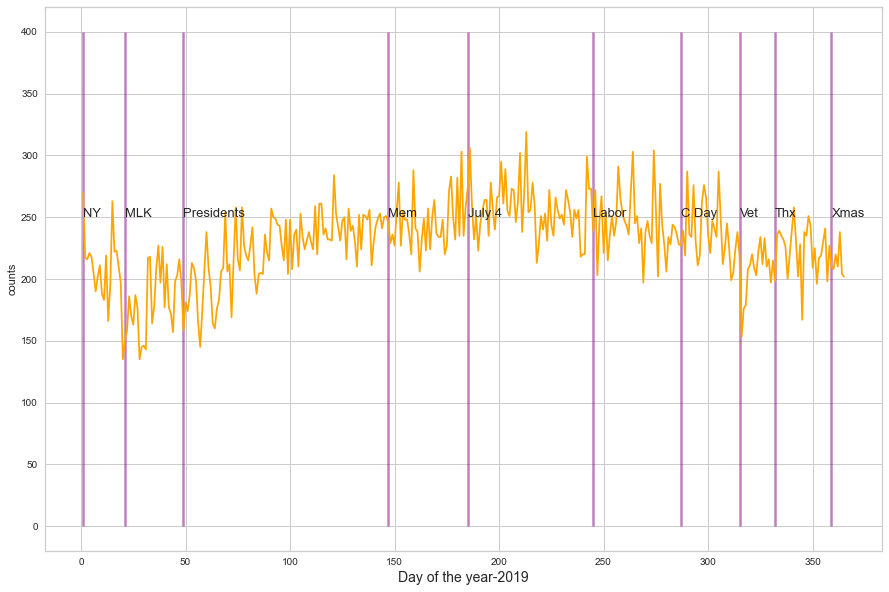

In [36]:
# Create data for plotting
df['Day_of_year'] = df.Incident_timestamp.dt.dayofyear
data_holidays = df[df.Year == 2019].groupby(['Day_of_year']).size().reset_index(name='counts')

# Dates of major U.S. holidays in 2019
holidays = pd.Series(['2019-01-01', # New Years Day
                     '2019-01-21', # MLK Day
                     '2019-02-18', #presidents day
                     '2019-05-27', # Memorial Day
                     '2019-07-04', # Independence Day
                     '2019-09-02', # Labor Day
                     '2019-10-14', # Columbus day
                     '2019-11-11', # Veterans Day
                     '2019-11-28', # Thanksgiving
                     '2019-12-25']) # Christmas
holidays = pd.to_datetime(holidays).dt.dayofyear
holidays_names = ['NY',
                 'MLK',
                 'Presidents',
                 'Mem',
                 'July 4',
                 'Labor',
                 'C Day',
                 'Vet',
                 'Thx',
                 'Xmas']

import datetime as dt
# Plot crimes and holidays
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x='Day_of_year',
            y='counts',
            ax=ax,
            color='orange', 
            data=data_holidays)
plt.xlabel('Day of the year-2019', size=14)
plt.vlines(holidays, 0, 400, alpha=0.5, color ='purple', linewidth=2.5, linestyle=("solid"))
for i in range(len(holidays)):
    plt.text(x=holidays[i], y=250, s=holidays_names[i], size = 13)

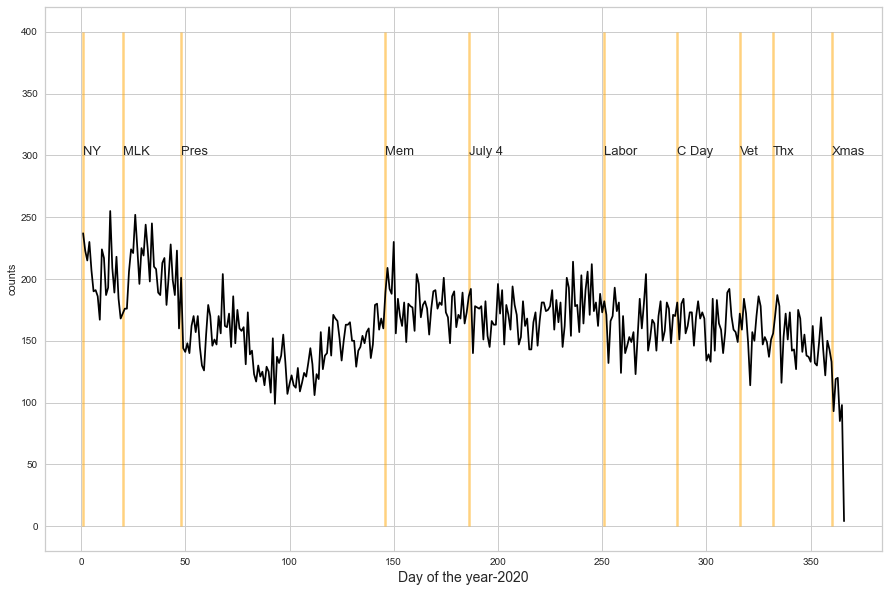

In [37]:
# Create data for plotting
df['Day_of_year'] = df.Incident_timestamp.dt.dayofyear
data_holidays = df[df.Year == 2020].groupby(['Day_of_year']).size().reset_index(name='counts')

# Dates of major U.S. holidays in 2017
holidays = pd.Series(['2020-01-01', # New Years Day
                     '2020-01-20', # MLK Day
                     '2020-02-17', #presidents day
                     '2020-05-25', # Memorial Day
                     '2020-07-04', # Independence Day
                     '2020-09-07', # Labor Day
                     '2020-10-12', # Columbus day
                     '2020-11-11', # Veterans Day
                     '2020-11-27', # Thanksgiving
                     '2020-12-25']) # Christmas
holidays = pd.to_datetime(holidays).dt.dayofyear
holidays_names = ['NY',
                 'MLK',
                 'Pres',
                 'Mem',
                 'July 4',
                 'Labor',
                 'C Day',
                 'Vet',
                 'Thx',
                 'Xmas']

import datetime as dt
# Plot crimes and holidays
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x='Day_of_year',
            y='counts',
            ax=ax,
            color='black', 
            data=data_holidays)
plt.xlabel('Day of the year-2020', size=14)
plt.vlines(holidays, 0, 400, alpha=0.5, color ='orange', linewidth=2.5, linestyle=("solid"))
for i in range(len(holidays)):
    plt.text(x=holidays[i], y=300, s=holidays_names[i], size = 13)

In [53]:
df['Incident'] = 1

In [54]:
df.head()

Address      Description  Offense  Offense_code  \
0     Scotten St & Milford St          ROBBERY  ROBBERY          1201   
1   Bedford St & E Warren Ave          ROBBERY  ROBBERY          1201   
2       Russell St & Maple St          ROBBERY  ROBBERY          1201   
3  Hessel Ave & Huntington Rd          ROBBERY  ROBBERY          1201   
4     Scripps St & Newport St  LARCENY - OTHER  LARCENY          2307   

  Report_time      Time  Day_number Day_of_week  Hour  Month  ...        Date  \
0    04:00:00  23:00:00           6      Sunday    23      2  ...  2017-02-05   
1    16:51:00  12:51:00           4      Friday    12      3  ...  2017-03-24   
2    00:02:00  20:02:00           0      Monday    20      4  ...  2017-04-17   
3    08:10:00   4:10:00           4      Friday     4      4  ...  2017-04-21   
4    20:14:00  16:14:00           6      Sunday    16      4  ...  2017-04-23   

  Scout_car_area Precinct      Block_id        Neighborhood Council_dist  \
0           1009       10  2.616350e+14             Midwest            5   
1            504        5  2.616350e+14         Morningside            4   
2            709        7  2.616350e+14      Lafayette Park            5   
3            803        8  2.616350e+14         O'Hair Park            1   
4            512        5  2.616350e+14  Jefferson Chalmers            4   

     Zip       Long        Lat  Incident  
0  48210 -83.112285  42.349950         1  
1  48224 -82.940962  42.402000         1  
2  48207 -83.037944  42.342367         1  
3  48219 -83.234482  42.442283         1  
4  48215 -82.938813  42.359723         1  

[5 rows x 21 columns]

In [16]:
df['Neighborhood'].value_counts()

Warrendale            8922
Downtown              7225
Franklin Park         6073
Midtown               5538
Outer Drive-Hayes     4990
                      ... 
West Virginia Park      90
Arden Park              77
Waterworks Park         47
Douglass                31
Belle Isle              28
Name: Neighborhood, Length: 207, dtype: int64

In [17]:
df['Council_dist'].value_counts()

7    49449
1    48242
5    45965
2    44591
4    43139
3    42587
6    40881
Name: Council_dist, dtype: int64

In [34]:
df['Offense'].value_counts()

ASSAULT                   56758
LARCENY                   48845
DAMAGE TO PROPERTY        38793
AGGRAVATED ASSAULT        32021
BURGLARY                  27683
STOLEN VEHICLE            25633
FRAUD                     25577
ROBBERY                    8745
WEAPONS OFFENSES           8612
DANGEROUS DRUGS            7704
SEX OFFENSES               4913
OBSTRUCTING JUDICIARY      4513
STOLEN PROPERTY            3277
ARSON                      3133
SEXUAL ASSAULT             2834
OUIL                       2592
FAMILY OFFENSE             2376
MISCELLANEOUS              2015
OBSTRUCTING THE POLICE     1772
RUNAWAY                    1447
DISORDERLY CONDUCT         1241
HOMICIDE                   1047
FORGERY                    1003
OTHER                       933
KIDNAPPING                  744
LIQUOR                      382
EXTORTION                   165
JUSTIFIABLE HOMICIDE         62
SOLICITATION                 28
GAMBLING                      6
Name: Offense, dtype: int64

In [56]:
df['Offense'] = df['Offense'].str.replace('MISCELLANEOUS', 'OTHER')
df['Offense'] = df['Offense'].str.replace('LIQUOR', 'OUIL')
df['Offense'] = df['Offense'].str.replace('AGGRAVATED ASSAULT', 'ASSAULT')

In [57]:
df['Offense'].value_counts()

ASSAULT                   88779
LARCENY                   48845
DAMAGE TO PROPERTY        38793
BURGLARY                  27683
STOLEN VEHICLE            25633
FRAUD                     25577
ROBBERY                    8745
WEAPONS OFFENSES           8612
DANGEROUS DRUGS            7704
SEX OFFENSES               4913
OBSTRUCTING JUDICIARY      4513
STOLEN PROPERTY            3277
ARSON                      3133
OUIL                       2974
OTHER                      2948
SEXUAL ASSAULT             2834
FAMILY OFFENSE             2376
OBSTRUCTING THE POLICE     1772
RUNAWAY                    1447
DISORDERLY CONDUCT         1241
HOMICIDE                   1047
FORGERY                    1003
KIDNAPPING                  744
EXTORTION                   165
JUSTIFIABLE HOMICIDE         62
SOLICITATION                 28
GAMBLING                      6
Name: Offense, dtype: int64

In [17]:
df.isnull().sum()

Address           0
Description       0
Offense           0
Offense_code      0
Arrest_Charge     0
Time              0
Hour              0
Year              0
Scout_car_area    0
Precinct          0
Block_id          0
Neighborhood      0
Council_dist      0
Zip               0
Long              0
Lat               0
Date              0
Report_time       0
Month             0
Day_of_week       0
Day_number        0
dtype: int64

In [58]:
df.shape

(314854, 20)

In [21]:
df_cat = pd.pivot_table(df,
                       values=['Year'],
                       index=['Neighborhood'],
                       columns=['Offense'],
                       aggfunc=len,
                       fill_value=0,
                       margins=True)
df_cat

Year                                                      \
Offense          ARSON ASSAULT BURGLARY DAMAGE TO PROPERTY DANGEROUS DRUGS   
Neighborhood                                                                 
Airport Sub         55     833      315                378             145   
Arden Park           1      12        9                  5               2   
Aviation Sub         6     251      115                106               9   
Bagley              25     974      455                471              43   
Barton-McFarland    51    1655      415                599             156   
...                ...     ...      ...                ...             ...   
Wildemere Park      20     131       32                 64               8   
Winship              9     877      270                381              30   
Woodbridge           4     147       51                100              21   
Yorkshire Woods     26     692      251                300              62   
All               3133   88779    27683              38793            7704   

                                                                             \
Offense          DISORDERLY CONDUCT EXTORTION FAMILY OFFENSE FORGERY  FRAUD   
Neighborhood                                                                  
Airport Sub                      11         5             20      14    272   
Arden Park                        0         0              0       0      6   
Aviation Sub                      0         1              4       0     78   
Bagley                            5         4             44      10    456   
Barton-McFarland                  7         1             32       9    344   
...                             ...       ...            ...     ...    ...   
Wildemere Park                    0         0              1       1     36   
Winship                          10         0             18      12    286   
Woodbridge                        5         0              4       7     56   
Yorkshire Woods                   3         1             22       2    124   
All                            1241       165           2376    1003  25577   

                  ...                                                    \
Offense           ...  OUIL ROBBERY RUNAWAY SEX OFFENSES SEXUAL ASSAULT   
Neighborhood      ...                                                     
Airport Sub       ...    42     121       5           11             31   
Arden Park        ...     0       0       0            0              0   
Aviation Sub      ...     8      17       3            5              8   
Bagley            ...    17     102      16           31             16   
Barton-McFarland  ...    31     135      21           95             49   
...               ...   ...     ...     ...          ...            ...   
Wildemere Park    ...     3      18       2            4             11   
Winship           ...    31     105       4           35             23   
Woodbridge        ...    24      35       1            8              9   
Yorkshire Woods   ...    12      62      11           16             24   
All               ...  2974    8745    1447         4913           2834   

                                                                               \
Offense          SOLICITATION STOLEN PROPERTY STOLEN VEHICLE WEAPONS OFFENSES   
Neighborhood                                                                    
Airport Sub                 0              74            286              110   
Arden Park                  0               0             13                2   
Aviation Sub                0               7            135                6   
Bagley                      0              21            516               65   
Barton-McFarland            1              61            393              138   
...                       ...             ...            ...              ...   
Wildemere Park              0         

In [22]:
df_cat.reset_index(inplace = True)
df_cat.columns = df_cat.columns.map(''.join)
df_cat.rename(columns={'YearAll':'Total'}, inplace=True)

df_cat.head()

Neighborhood  YearARSON  YearASSAULT  YearBURGLARY  \
0       Airport Sub         55          833           315   
1        Arden Park          1           12             9   
2      Aviation Sub          6          251           115   
3            Bagley         25          974           455   
4  Barton-McFarland         51         1655           415   

   YearDAMAGE TO PROPERTY  YearDANGEROUS DRUGS  YearDISORDERLY CONDUCT  \
0                     378                  145                      11   
1                       5                    2                       0   
2                     106                    9                       0   
3                     471                   43                       5   
4                     599                  156                       7   

   YearEXTORTION  YearFAMILY OFFENSE  YearFORGERY  ...  YearOUIL  YearROBBERY  \
0              5                  20           14  ...        42          121   
1              0                   0            0  ...         0            0   
2              1                   4            0  ...         8           17   
3              4                  44           10  ...        17          102   
4              1                  32            9  ...        31          135   

   YearRUNAWAY  YearSEX OFFENSES  YearSEXUAL ASSAULT  YearSOLICITATION  \
0            5                11                  31                 0   
1            0                 0                   0                 0   
2            3                 5                   8                 0   
3           16                31                  16                 0   
4           21                95                  49                 1   

   YearSTOLEN PROPERTY  YearSTOLEN VEHICLE  YearWEAPONS OFFENSES  Total  
0                   74                 286                   110   3387  
1                    0                  13                     2     77  
2                    7                 135                     6    906  
3                   21                 516                    65   3978  
4                   61                 393                   138   4893  

[5 rows x 29 columns]

In [23]:
df_cat.sort_values(['Total'], ascending = False, axis = 0, inplace = True)
df_cat_top5 = df_cat.iloc[1:6]
df_cat_top5

Neighborhood  YearARSON  YearASSAULT  YearBURGLARY  \
192         Warrendale         96         2794           900   
45            Downtown          6         1331           117   
64       Franklin Park         49         1944           521   
120            Midtown         13         1089           230   
147  Outer Drive-Hayes         92         1578           492   

     YearDAMAGE TO PROPERTY  YearDANGEROUS DRUGS  YearDISORDERLY CONDUCT  \
192                    1136                  400                      28   
45                      717                  146                     149   
64                      817                  166                      41   
120                     658                  123                      78   
147                     615                  150                      13   

     YearEXTORTION  YearFAMILY OFFENSE  YearFORGERY  ...  YearOUIL  \
192              5                  84           17  ...        60   
45               4                  13           47  ...       216   
64               3                  67           18  ...        36   
120              6                  29           40  ...       122   
147              0                  37           17  ...        24   

     YearROBBERY  YearRUNAWAY  YearSEX OFFENSES  YearSEXUAL ASSAULT  \
192          217           34               122                  70   
45           195            2                97                  71   
64           155           27                37                  51   
120          190            8                47                  48   
147          143            9                37                  54   

     YearSOLICITATION  YearSTOLEN PROPERTY  YearSTOLEN VEHICLE  \
192                 1                   94                 577   
45                  0                   26                 426   
64                  0                   99                 403   
120                 0                   30                 286   
147                 1                   71                 409   

     YearWEAPONS OFFENSES  Total  
192                   220   8922  
45                    212   7225  
64                    190   6073  
120                    49   5538  
147                   193   4990  

[5 rows x 29 columns]

In [119]:
df_cat.describe().T

count         mean           std   min     25%  \
YearARSON                   208.0    30.125000    216.968182   0.0    2.00   
YearASSAULT                 208.0   853.644231   6141.107579   1.0  149.75   
YearBURGLARY                208.0   266.182692   1915.211545   0.0   42.00   
YearDAMAGE TO PROPERTY      208.0   373.009615   2682.693178   3.0   67.75   
YearDANGEROUS DRUGS         208.0    74.076923    533.796750   0.0    8.00   
YearDISORDERLY CONDUCT      208.0    11.932692     86.728937   0.0    1.00   
YearEXTORTION               208.0     1.586538     11.455531   0.0    0.00   
YearFAMILY OFFENSE          208.0    22.846154    164.429552   0.0    3.00   
YearFORGERY                 208.0     9.644231     69.528560   0.0    1.00   
YearFRAUD                   208.0   245.932692   1768.639422   0.0   44.75   
YearGAMBLING                208.0     0.057692      0.446715   0.0    0.00   
YearHOMICIDE                208.0    10.067308     72.472585   0.0    1.00   
YearJUSTIFIABLE HOMICIDE    208.0     0.596154      4.317181   0.0    0.00   
YearKIDNAPPING              208.0     7.153846     51.481580   0.0    1.00   
YearLARCENY                 208.0   469.663462   3380.563576  10.0   90.00   
YearOBSTRUCTING JUDICIARY   208.0    43.394231    312.397691   0.0    6.00   
YearOBSTRUCTING THE POLICE  208.0    17.038462    122.736308   0.0    2.00   
YearOTHER                   208.0    28.346154    204.401200   0.0    3.75   
YearOUIL                    208.0    28.596154    206.169131   0.0    4.00   
YearROBBERY                 208.0    84.086538    604.889987   0.0   13.00   
YearRUNAWAY                 208.0    13.913462    102.385566   0.0    1.00   
YearSEX OFFENSES            208.0    47.240385    342.530960   0.0    3.00   
YearSEXUAL ASSAULT          208.0    27.250000    196.034762   0.0    4.00   
YearSOLICITATION            208.0     0.269231      2.008344   0.0    0.00   
YearSTOLEN PROPERTY         208.0    31.509615    226.813081   0.0    4.00   
YearSTOLEN VEHICLE          208.0   246.471154   1772.209622   0.0   48.75   
YearWEAPONS OFFENSES        208.0    82.807692    595.951901   0.0    9.00   
Total                       208.0  3027.442308  21772.870554  28.0  584.25   

                               50%      75%       max  
YearARSON                      8.5    22.00    3133.0  
YearASSAULT                  266.5   581.25   88779.0  
YearBURGLARY                  94.5   163.75   27683.0  
YearDAMAGE TO PROPERTY       129.5   232.25   38793.0  
YearDANGEROUS DRUGS           21.0    46.50    7704.0  
YearDISORDERLY CONDUCT         3.0     6.25    1241.0  
YearEXTORTION                  0.0     1.00     165.0  
YearFAMILY OFFENSE             7.0    15.25    2376.0  
YearFORGERY                    3.0     7.00    1003.0  
YearFRAUD                     84.5   167.00   25577.0  
YearGAMBLING                   0.0     0.00       6.0  
YearHOMICIDE                   3.0     7.00    1047.0  
YearJUSTIFIABLE HOMICIDE       0.0     0.25      62.0  
YearKIDNAPPING                 3.0     5.25     744.0  
YearLARCENY                  163.0   305.50   48845.0  
YearOBSTRUCTING JUDICIARY     14.0    29.00    4513.0  
YearOBSTRUCTING THE POLICE     5.0    12.00    1772.0  
YearOTHER                      8.0    17.00    2948.0  
YearOUIL                      10.0    18.00    2974.0  
YearROBBERY                   28.5    56.25    8745.0  
YearRUNAWAY                    3.0     7.00    1447.0  
YearSEX OFFENSES               9.0    18.25    4913.0  
YearSEXUAL ASSAULT             9.0    19.25    2834.0  
YearSOLICITATION               0.0     0.00      28.0  
YearSTOLEN PROPERTY            8.5    22.25    3277.0  
YearSTOLEN VEHICLE            87.0   161.25   25633.0  
YearWEAPONS OFFENSES          24.0    59.00    8612.0  
Total                       1032.5  1894.75  314854.0

In [124]:
df_dist = pd.pivot_table(df,
                       values=['Year'],
                       index=['Council_dist'],
                       columns=['Offense'],
                       aggfunc=len,
                       fill_value=0,
                       margins=True)
df_dist

Year                                            \
Offense      AGGRAVATED ASSAULT ARSON ASSAULT BURGLARY DAMAGE TO PROPERTY   
Council_dist                                                                
1                          5051   436    8968     4726               6037   
2                          4600   354    7967     4190               5569   
3                          4718   561    7732     4134               5239   
4                          5082   570    7738     4667               5162   
5                          3658   310    7653     2924               5542   
6                          3177   400    6781     2526               4911   
7                          5735   502    9919     4516               6333   
All                       32021  3133   56758    27683              38793   

                                                                          \
Offense      DANGEROUS DRUGS DISORDERLY CONDUCT EXTORTION FAMILY OFFENSE   
Council_dist                                                               
1                        988                136        19            436   
2                        616                102        26            408   
3                       1299                144        22            340   
4                       1239                167        12            285   
5                        984                272        29            237   
6                       1127                253        35            222   
7                       1451                167        22            448   
All                     7704               1241       165           2376   

                      ...                                                    \
Offense      FORGERY  ...  OUIL ROBBERY RUNAWAY SEX OFFENSES SEXUAL ASSAULT   
Council_dist          ...                                                     
1                117  ...   348    1135     146          780            405   
2                106  ...   324    1255     149          524            333   
3                155  ...   318    1290      84          939            410   
4                136  ...   290    1160     182          799            418   
5                202  ...   508    1284     568          381            467   
6                174  ...   466    1316     108          764            375   
7                113  ...   338    1305     210          726            426   
All             1003  ...  2592    8745    1447         4913           2834   

                                                                           \
Offense      SOLICITATION STOLEN PROPERTY STOLEN VEHICLE WEAPONS OFFENSES   
Council_dist                                                                
1                       6             509           4179             1563   
2                       0             389           4332             1097   
3                       3             529           2969             1262   
4                       2             469           3285             1432   
5                       3             392           4087             1101   
6                       7             376           3113              850   
7                       7             613           3668             1307   
All                    28            3277          25633             8612   

                      
Offense          All  
Council_dist          
1              48242  
2              44591  
3              42587  
4              43139  
5              45965  
6              40881  
7              49449  
All           314854  

[8 rows x 31 columns]

In [125]:
df_dist.reset_index(inplace = False)
df_dist.columns = df_dist.columns.map(''.join)
df_dist.rename(columns={'YearAll':'Total'}, inplace=True)

df_dist.head()

YearAGGRAVATED ASSAULT  YearARSON  YearASSAULT  YearBURGLARY  \
Council_dist                                                                 
1                               5051        436         8968          4726   
2                               4600        354         7967          4190   
3                               4718        561         7732          4134   
4                               5082        570         7738          4667   
5                               3658        310         7653          2924   

              YearDAMAGE TO PROPERTY  YearDANGEROUS DRUGS  \
Council_dist                                                
1                               6037                  988   
2                               5569                  616   
3                               5239                 1299   
4                               5162                 1239   
5                               5542                  984   

              YearDISORDERLY CONDUCT  YearEXTORTION  YearFAMILY OFFENSE  \
Council_dist                                                              
1                                136             19                 436   
2                                102             26                 408   
3                                144             22                 340   
4                                167             12                 285   
5                                272             29                 237   

              YearFORGERY  ...  YearOUIL  YearROBBERY  YearRUNAWAY  \
Council_dist               ...                                       
1                     117  ...       348         1135          146   
2                     106  ...       324         1255          149   
3                     155  ...       318         1290           84   
4                     136  ...       290         1160          182   
5                     202  ...       508         1284          568   

              YearSEX OFFENSES  YearSEXUAL ASSAULT  YearSOLICITATION  \
Council_dist                                                           
1                          780                 405                 6   
2                          524                 333                 0   
3                          939                 410                 3   
4                          799                 418                 2   
5                          381                 467                 3   

              YearSTOLEN PROPERTY  YearSTOLEN VEHICLE  YearWEAPONS OFFENSES  \
Council_dist                                                                  
1                             509                4179                  1563   
2                             389                4332                  1097   
3                             529                2969                  1262   
4                             469                3285                  1432   
5                             392                4087                  1101   

              Total  
Council_dist         
1             48242  
2             44591  
3             42587  
4             43139  
5             45965  

[5 rows x 31 columns]

In [128]:
df_dist.sort_values(['Total'], ascending = False, axis = 0, inplace = True)
df_dist_top3 = df_dist.iloc[1:4]
df_dist_top3

YearAGGRAVATED ASSAULT  YearARSON  YearASSAULT  YearBURGLARY  \
Council_dist                                                                 
7                               5735        502         9919          4516   
1                               5051        436         8968          4726   
5                               3658        310         7653          2924   

              YearDAMAGE TO PROPERTY  YearDANGEROUS DRUGS  \
Council_dist                                                
7                               6333                 1451   
1                               6037                  988   
5                               5542                  984   

              YearDISORDERLY CONDUCT  YearEXTORTION  YearFAMILY OFFENSE  \
Council_dist                                                              
7                                167             22                 448   
1                                136             19                 436   
5                                272             29                 237   

              YearFORGERY  ...  YearOUIL  YearROBBERY  YearRUNAWAY  \
Council_dist               ...                                       
7                     113  ...       338         1305          210   
1                     117  ...       348         1135          146   
5                     202  ...       508         1284          568   

              YearSEX OFFENSES  YearSEXUAL ASSAULT  YearSOLICITATION  \
Council_dist                                                           
7                          726                 426                 7   
1                          780                 405                 6   
5                          381                 467                 3   

              YearSTOLEN PROPERTY  YearSTOLEN VEHICLE  YearWEAPONS OFFENSES  \
Council_dist                                                                  
7                             613                3668                  1307   
1                             509                4179                  1563   
5                             392                4087                  1101   

              Total  
Council_dist         
7             49449  
1             48242  
5             45965  

[3 rows x 31 columns]

In [129]:
df_dist.describe().T

count      mean           std      min       25%  \
YearAGGRAVATED ASSAULT        8.0   8005.25   9737.963908   3177.0   4364.50   
YearARSON                     8.0    783.25    954.012691    310.0    388.50   
YearASSAULT                   8.0  14189.50  17226.353540   6781.0   7712.25   
YearBURGLARY                  8.0   6920.75   8428.361758   2526.0   3831.50   
YearDAMAGE TO PROPERTY        8.0   9698.25  11765.199856   4911.0   5219.75   
YearDANGEROUS DRUGS           8.0   1926.00   2348.182154    616.0    987.00   
YearDISORDERLY CONDUCT        8.0    310.25    380.497325    102.0    142.00   
YearEXTORTION                 8.0     41.25     50.465688     12.0     21.25   
YearFAMILY OFFENSE            8.0    594.00    725.281226    222.0    273.00   
YearFORGERY                   8.0    250.75    305.730857    106.0    116.00   
YearFRAUD                     8.0   6394.25   7770.546069   2929.0   3227.75   
YearGAMBLING                  8.0      1.50      1.851640      0.0      1.00   
YearHOMICIDE                  8.0    261.75    317.647491    123.0    143.25   
YearJUSTIFIABLE HOMICIDE      8.0     15.50     18.905781      6.0      7.75   
YearKIDNAPPING                8.0    186.00    225.773591     87.0     98.25   
YearLARCENY                   8.0  12211.25  14907.885830   5246.0   5911.25   
YearLIQUOR                    8.0     95.50    117.209215     25.0     44.75   
YearMISCELLANEOUS             8.0    503.75    616.069048    206.0    250.00   
YearOBSTRUCTING JUDICIARY     8.0   1128.25   1371.807749    431.0    625.50   
YearOBSTRUCTING THE POLICE    8.0    443.00    538.865210    161.0    248.50   
YearOTHER                     8.0    233.25    292.287407     68.0     98.75   
YearOUIL                      8.0    648.00    789.212990    290.0    322.50   
YearROBBERY                   8.0   2186.25   2650.983631   1135.0   1231.25   
YearRUNAWAY                   8.0    361.75    464.295088     84.0    136.50   
YearSEX OFFENSES              8.0   1228.25   1498.943223    381.0    675.50   
YearSEXUAL ASSAULT            8.0    708.50    859.709752    333.0    397.50   
YearSOLICITATION              8.0      7.00      8.847921      0.0      2.75   
YearSTOLEN PROPERTY           8.0    819.25    996.449232    376.0    391.25   
YearSTOLEN VEHICLE            8.0   6408.25   7784.695218   2969.0   3242.00   
YearWEAPONS OFFENSES          8.0   2153.00   2619.047482    850.0   1100.00   
Total                         8.0  78713.50  95458.319536  40881.0  43001.00   

                                50%       75%       max  
YearAGGRAVATED ASSAULT       4884.5   5245.25   32021.0  
YearARSON                     469.0    563.25    3133.0  
YearASSAULT                  7852.5   9205.75   56758.0  
YearBURGLARY                 4353.0   4681.75   27683.0  
YearDAMAGE TO PROPERTY       5555.5   6111.00   38793.0  
YearDANGEROUS DRUGS          1183.0   1337.00    7704.0  
YearDISORDERLY CONDUCT        167.0    257.75    1241.0  
YearEXTORTION                  24.0     30.50     165.0  
YearFAMILY OFFENSE            374.0    439.00    2376.0  
YearFORGERY                   145.5    181.00    1003.0  
YearFRAUD                    3699.0   4401.25   25577.0  
YearGAMBLING                    1.0      1.00       6.0  
YearHOMICIDE                  159.5    162.50    1047.0  
YearJUSTIFIABLE HOMICIDE        9.0     10.75      62.0  
YearKIDNAPPING                110.5    120.25     744.0  
YearLARCENY                  6478.0   9320.00   48845.0  
YearLIQUOR                     61.5     72.75     382.0  
YearMISCELLANEOUS             274.0    352.25    2015.0  
YearOBSTRUCTING JUDICIARY     681.0    748.50    4513.0  
YearOBSTRUCTING THE POLICE    266.5    297.00    1772.0  
YearOTHER                     105.0    198.50     933.0  
YearOUIL                      343.0    476.50    2592.0  
YearROBBERY                  1287.0   1307.75    8745.0  
YearRUNAWAY                   165.5    299.50    1447.0  
YearSEX OFFENSES 

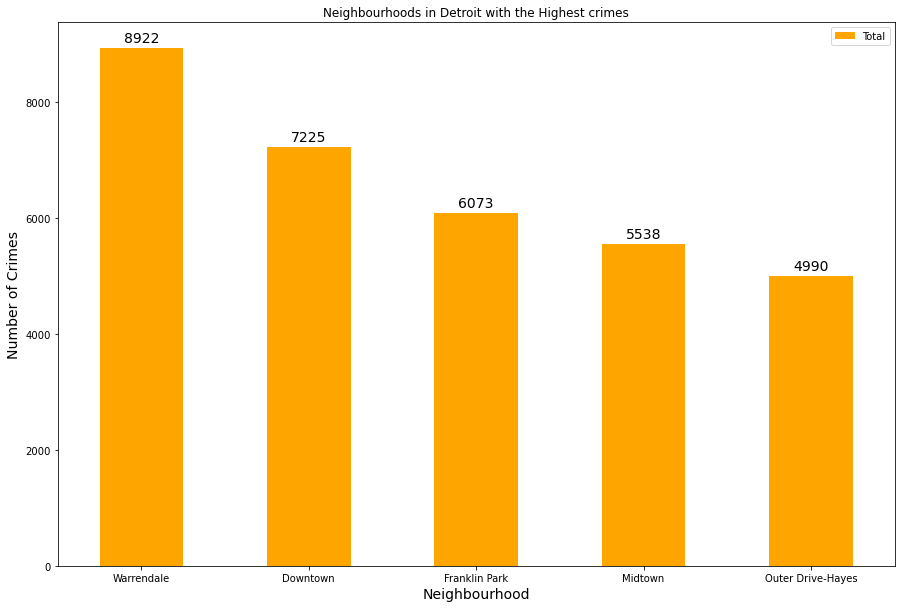

In [25]:
each_neighborhood = df_cat_top5[['Neighborhood', 'Total']]

each_neighborhood.set_index('Neighborhood', inplace = True)
ax = each_neighborhood.plot(kind='bar', color='Orange', figsize=(15, 10), rot=0)
ax.set_ylabel('Number of Crimes', fontsize = 14)
ax.set_xlabel('Neighbourhood', fontsize = 14)
ax.set_title('Neighbourhoods in Detroit with the Highest crimes')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

In [26]:
df_cat.sort_values(['Total'], ascending = True, axis = 0, inplace = True)
df_cat_low5 = df_cat.iloc[1:6]
df_cat_low5

Neighborhood  YearARSON  YearASSAULT  YearBURGLARY  \
44             Douglass          0            1             0   
193     Waterworks Park          0           15             2   
1            Arden Park          1           12             9   
201  West Virginia Park          2           16             2   
188       Virginia Park          1           13             8   

     YearDAMAGE TO PROPERTY  YearDANGEROUS DRUGS  YearDISORDERLY CONDUCT  \
44                        4                    1                       0   
193                       3                    0                       0   
1                         5                    2                       0   
201                      10                    0                       0   
188                      12                    0                       0   

     YearEXTORTION  YearFAMILY OFFENSE  YearFORGERY  ...  YearOUIL  \
44               0                   0            0  ...         0   
193              0                   2            0  ...         0   
1                0                   0            0  ...         0   
201              0                   0            2  ...         0   
188              0                   0            0  ...         0   

     YearROBBERY  YearRUNAWAY  YearSEX OFFENSES  YearSEXUAL ASSAULT  \
44             0            0                 0                   0   
193            0            0                 0                   1   
1              0            0                 0                   0   
201            1            0                 3                   0   
188            5            1                 1                   2   

     YearSOLICITATION  YearSTOLEN PROPERTY  YearSTOLEN VEHICLE  \
44                  0                    0                   3   
193                 0                    1                  11   
1                   0                    0                  13   
201                 0                    0                  21   
188                 0                    0                  15   

     YearWEAPONS OFFENSES  Total  
44                      0     31  
193                     0     47  
1                       2     77  
201                     1     90  
188                     1     91  

[5 rows x 29 columns]

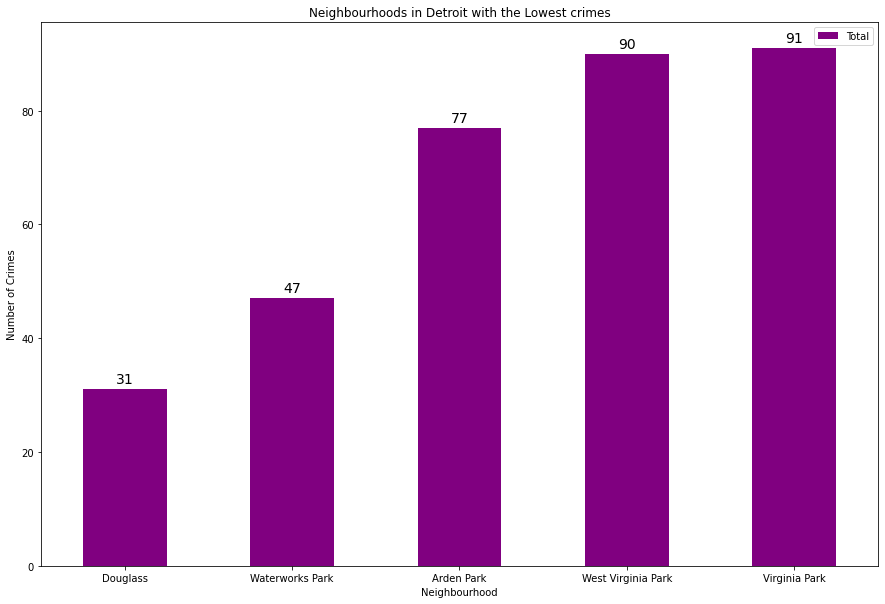

In [27]:
each_neighborhood = df_cat_low5[['Neighborhood', 'Total']]

each_neighborhood.set_index('Neighborhood', inplace = True)
ax = each_neighborhood.plot(kind='bar', color='Purple', figsize=(15, 10), rot=0)
ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Neighbourhood')
ax.set_title('Neighbourhoods in Detroit with the Lowest crimes')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


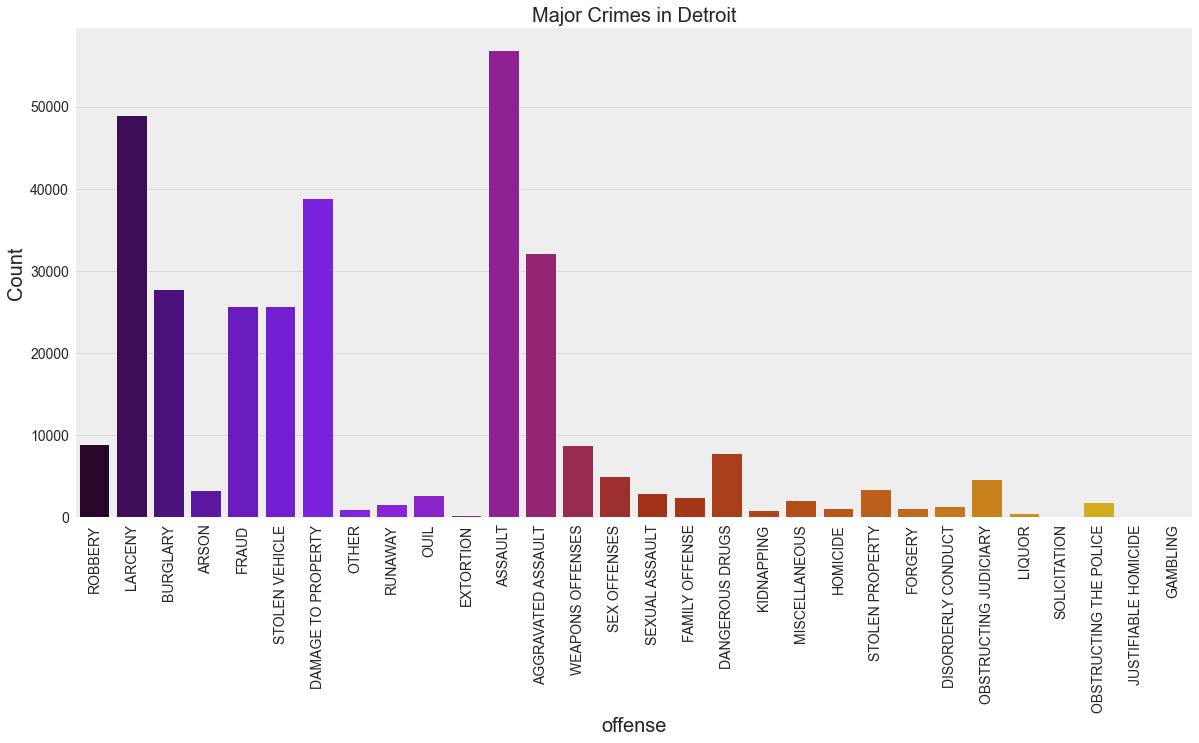

In [206]:
plt.rcParams['figure.figsize'] = (20,9)
plt.style.use('bmh')
sns.countplot(df['Offense'], palette = 'gnuplot')


plt.xlabel('offense', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Major Crimes in Detroit', fontweight = 30, fontsize = 20)
plt.xticks(size=14, rotation = 90)
plt.yticks(size=14)

plt.show()

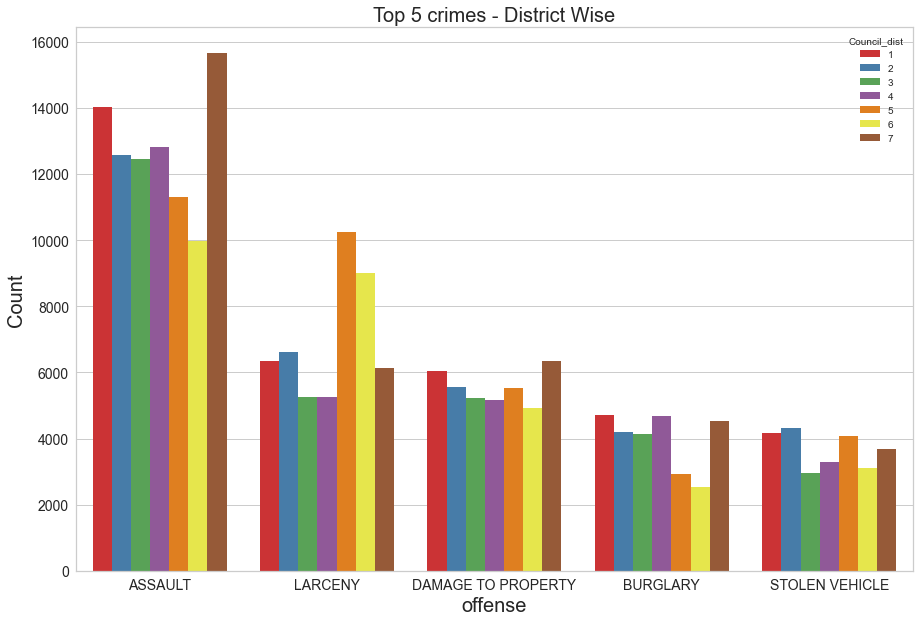

In [428]:
plt.rcParams["figure.figsize"] = 15,10
order = df['Offense'].value_counts().head(5).index
sns.countplot(data = df, x = 'Offense', hue = 'Council_dist', order = order, palette="Set1")

plt.xlabel('offense', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Top 5 crimes - District Wise', fontweight = 30, fontsize = 20)
plt.xticks(size=14, rotation = 0)
plt.yticks(size=14)
plt.show()

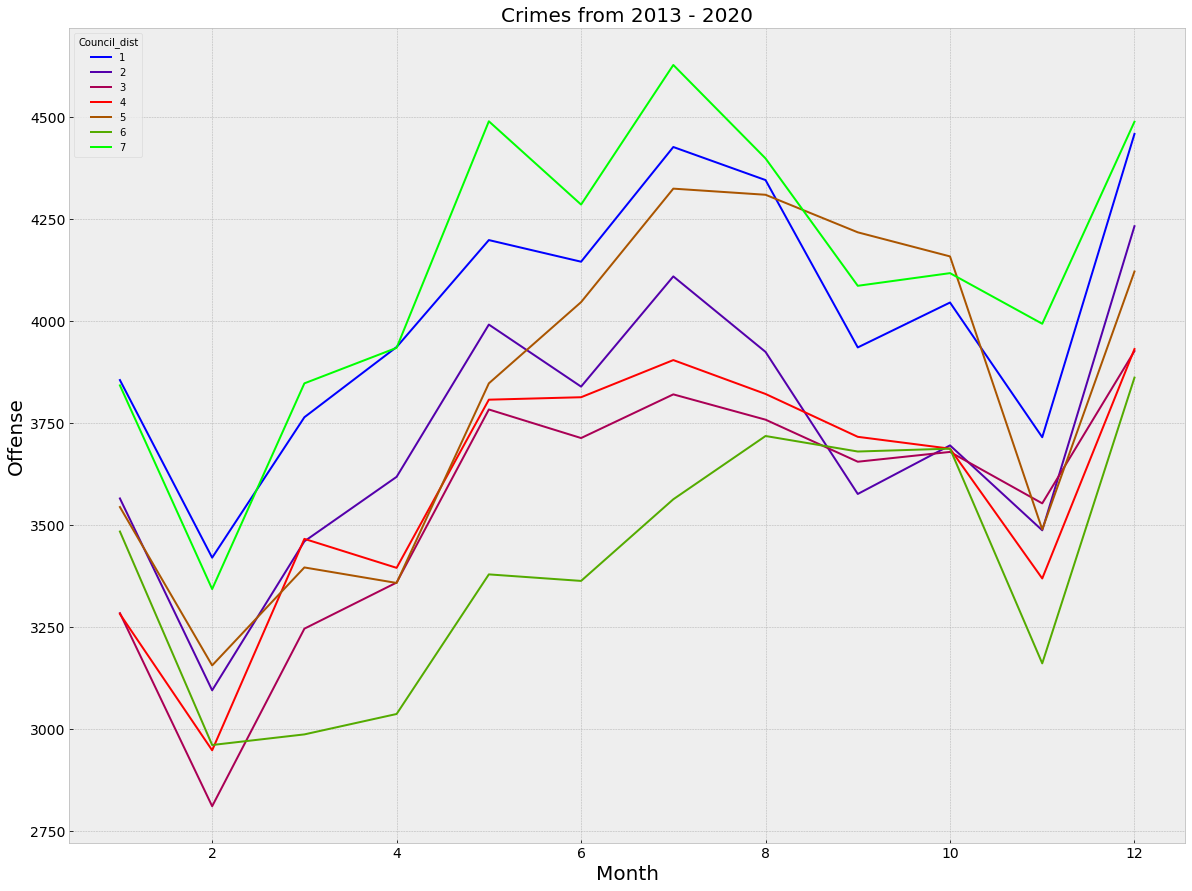

In [31]:
#mask = ((df['Year'] == 2017) | (df['Year'] == 2018) | (df['Year'] == 2019) | (df['Year'] == 2020))
grouped = df.groupby(['Month','Council_dist']).count()
sns.lineplot(data = grouped.reset_index(), x='Month', y='Offense',hue='Council_dist', palette="brg")
plt.xlabel('Month', fontsize=20)
plt.ylabel('Offense', fontsize=20)
plt.title('Crimes from 2013 - 2020', fontweight = 30, fontsize = 20)
plt.xticks(size=14, rotation = 0)
plt.yticks(size=14)
plt.show()

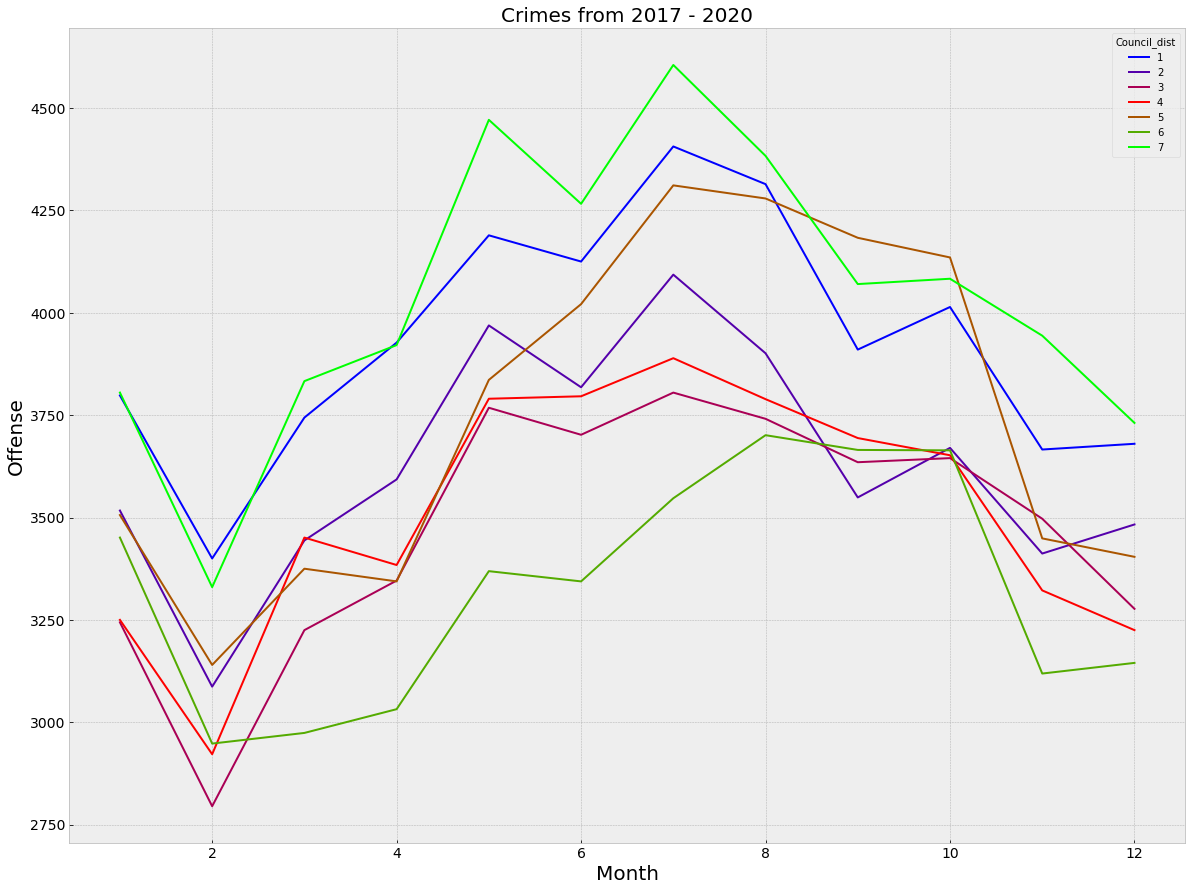

In [32]:
mask = ((df['Year'] == 2017) | (df['Year'] == 2018) | (df['Year'] == 2019) | (df['Year'] == 2020))
grouped = df[mask].groupby(['Month','Council_dist']).count()
sns.lineplot(data = grouped.reset_index(), x='Month', y='Offense',hue='Council_dist', palette="brg")
plt.xlabel('Month', fontsize=20)
plt.ylabel('Offense', fontsize=20)
plt.title('Crimes from 2017 - 2020', fontweight = 30, fontsize = 20)
plt.xticks(size=14, rotation = 0)
plt.yticks(size=14)
plt.show()

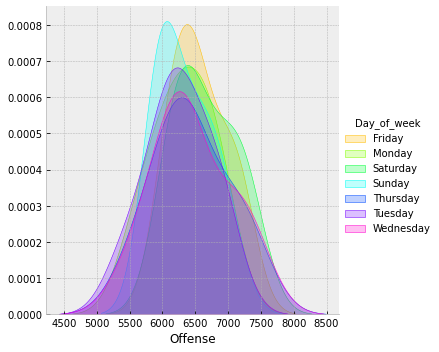

In [33]:
grouped = df.groupby(['Day_of_week','Council_dist']).count()
sns.FacetGrid(data = grouped.reset_index(), 
             palette = 'hsv',
             hue = "Day_of_week",
             height = 5).map(sns.kdeplot, "Offense", shade = True).add_legend();

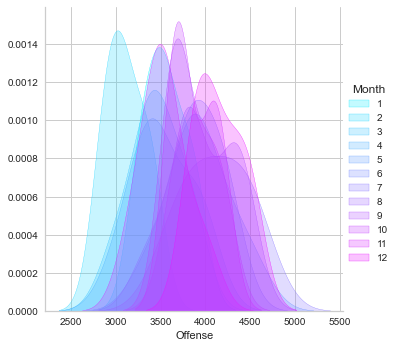

In [25]:
grouped = df.groupby(['Month','Council_dist']).count()
sns.FacetGrid(data = grouped.reset_index(), 
             palette = 'cool',
             hue = "Month",
             height = 5).map(sns.kdeplot, "Offense", shade = True).add_legend();

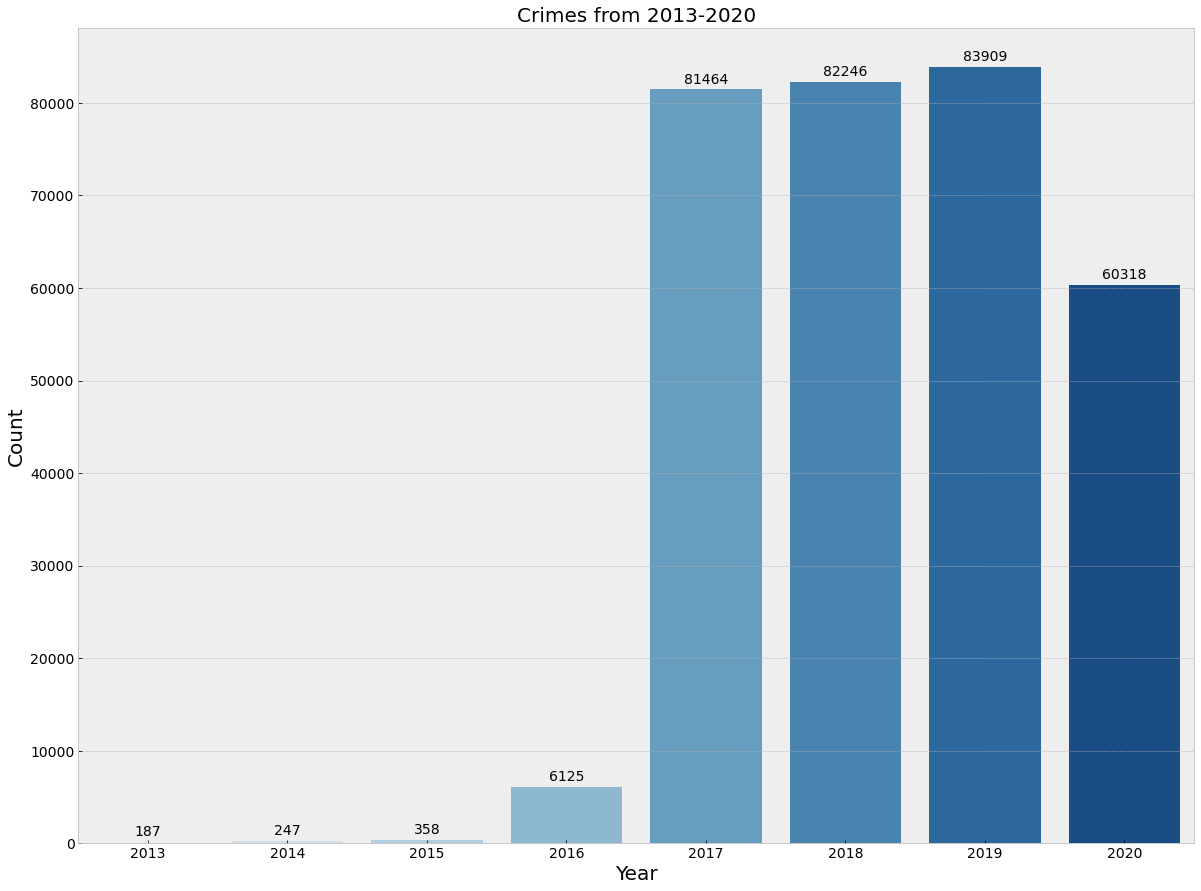

In [34]:
graph = sns.countplot(data=df, x='Year', palette="Blues")

for p in graph.patches:
    graph.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )


plt.xlabel('Year', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Crimes from 2013-2020', fontweight = 30, fontsize = 20)
plt.xticks(size=14, rotation = 0)
plt.yticks(size=14)
plt.show()

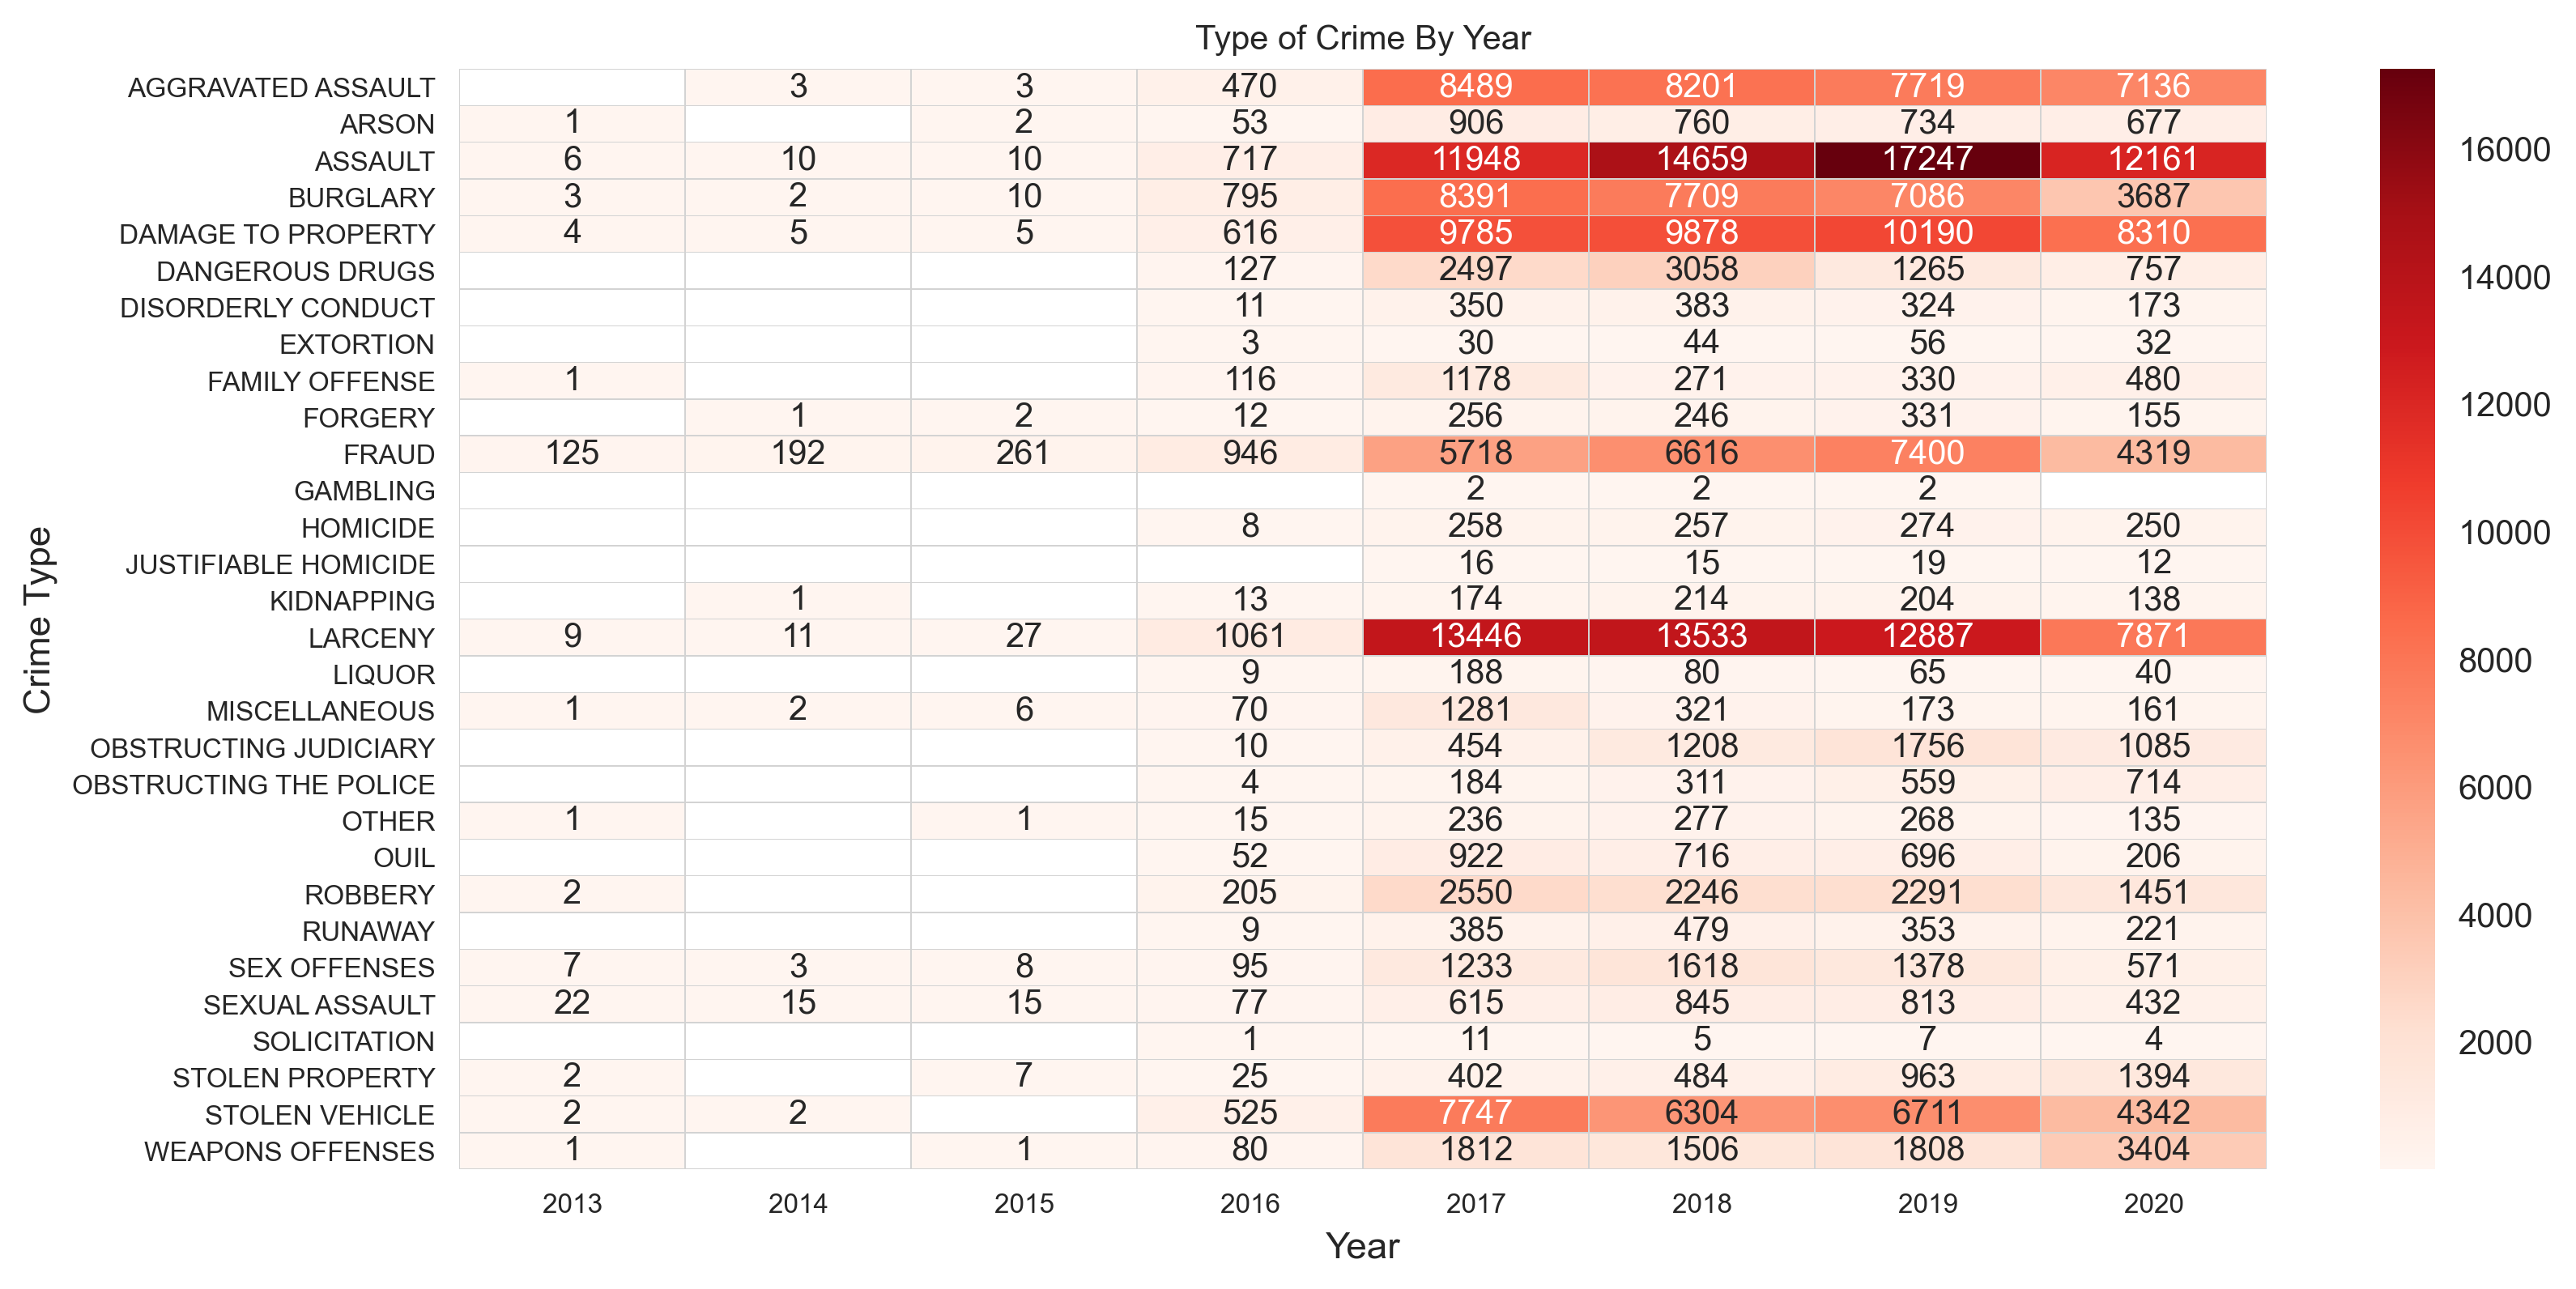

In [412]:
# Create a pivot table with month and category. 
dfPivYear = df.pivot_table(values='Incident', index='Offense', columns='Year', aggfunc=len)

fig, ax = plt.subplots(1, 1, figsize = (12, 6), dpi=300)
plt.title('Type of Crime By Year', fontsize=10)
plt.tick_params(labelsize=8)

sns.heatmap(
    dfPivYear.round(), 
    linecolor='lightgrey',
    linewidths=0.1,
    cmap='Reds', 
    annot=True, 
    fmt=".0f"
);

# Remove labels
ax.set_ylabel('Crime Type')    
ax.set_xlabel('Year')

plt.show()

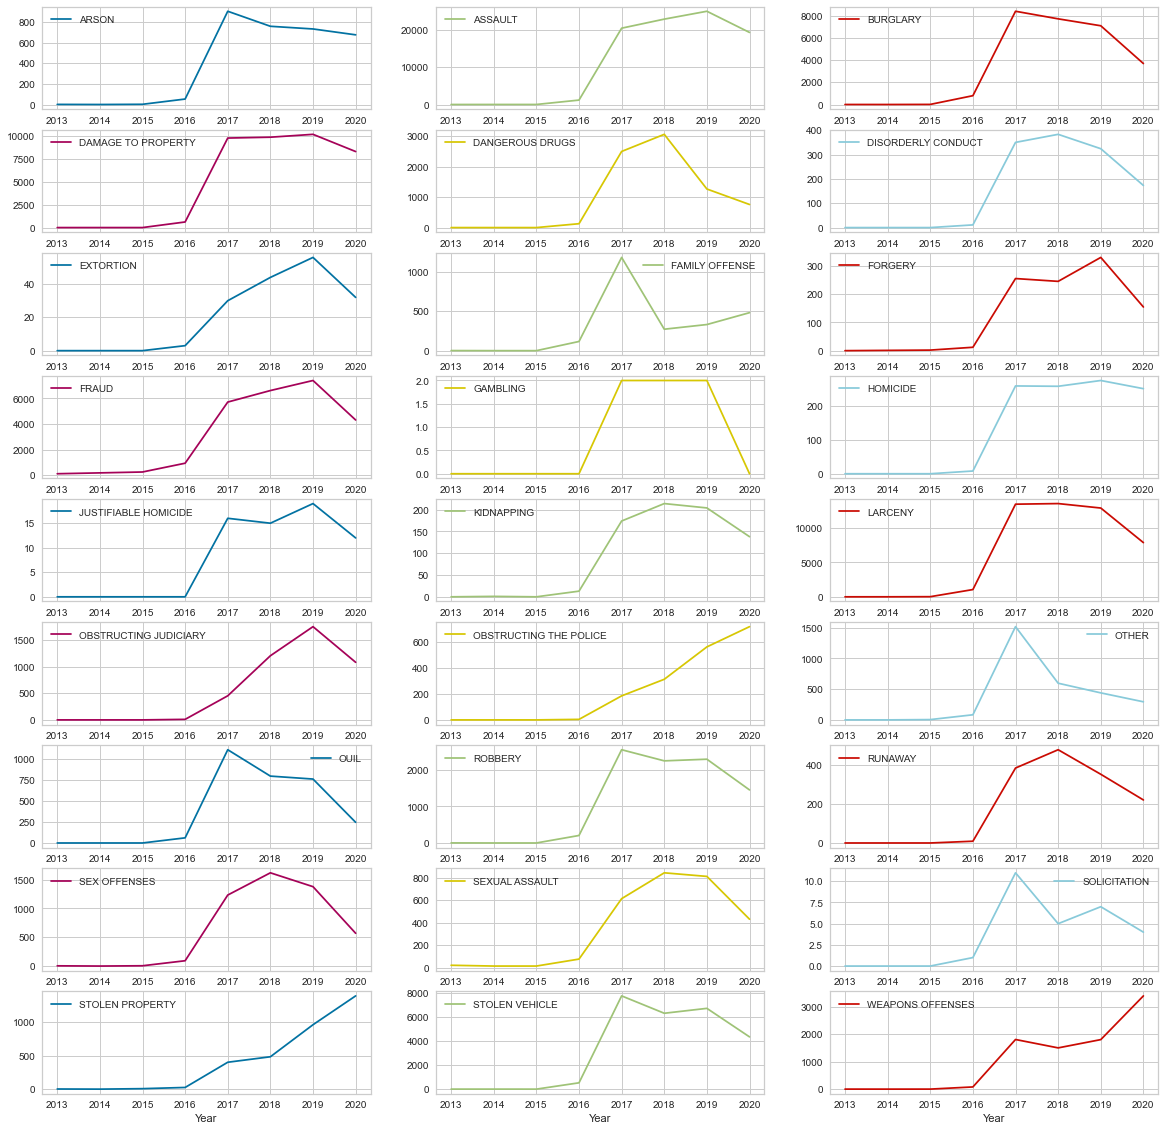

In [418]:
%matplotlib inline
# Crime count by Category per year
dfPivCrimeDate = df.pivot_table(values='Incident'
                                     ,aggfunc=np.size
                                     ,columns='Offense'
                                     ,index='Year'
                                     ,fill_value=0)
plo = dfPivCrimeDate.plot(figsize=(20, 20), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

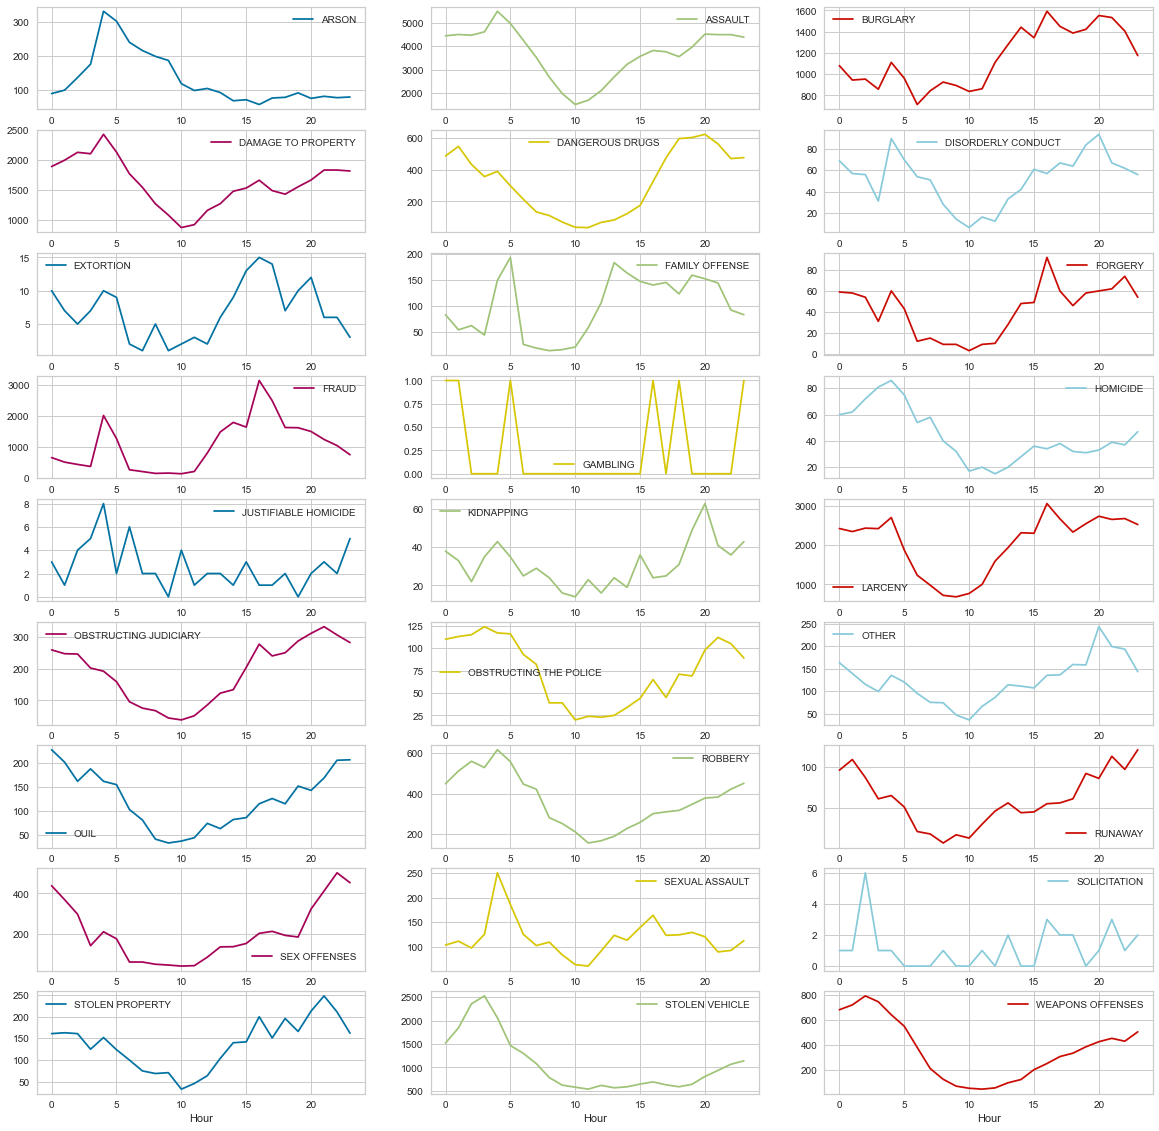

In [417]:
%matplotlib inline
# Crime count by Category per year
dfPivCrime_hour = df.pivot_table(values='Incident'
                                     ,aggfunc=np.size
                                     ,columns='Offense'
                                     ,index='Hour'
                                     ,fill_value=0)
plo = dfPivCrime_hour.plot(figsize=(20, 20), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

Text(-9.074999999999992, 0.5, 'Count')

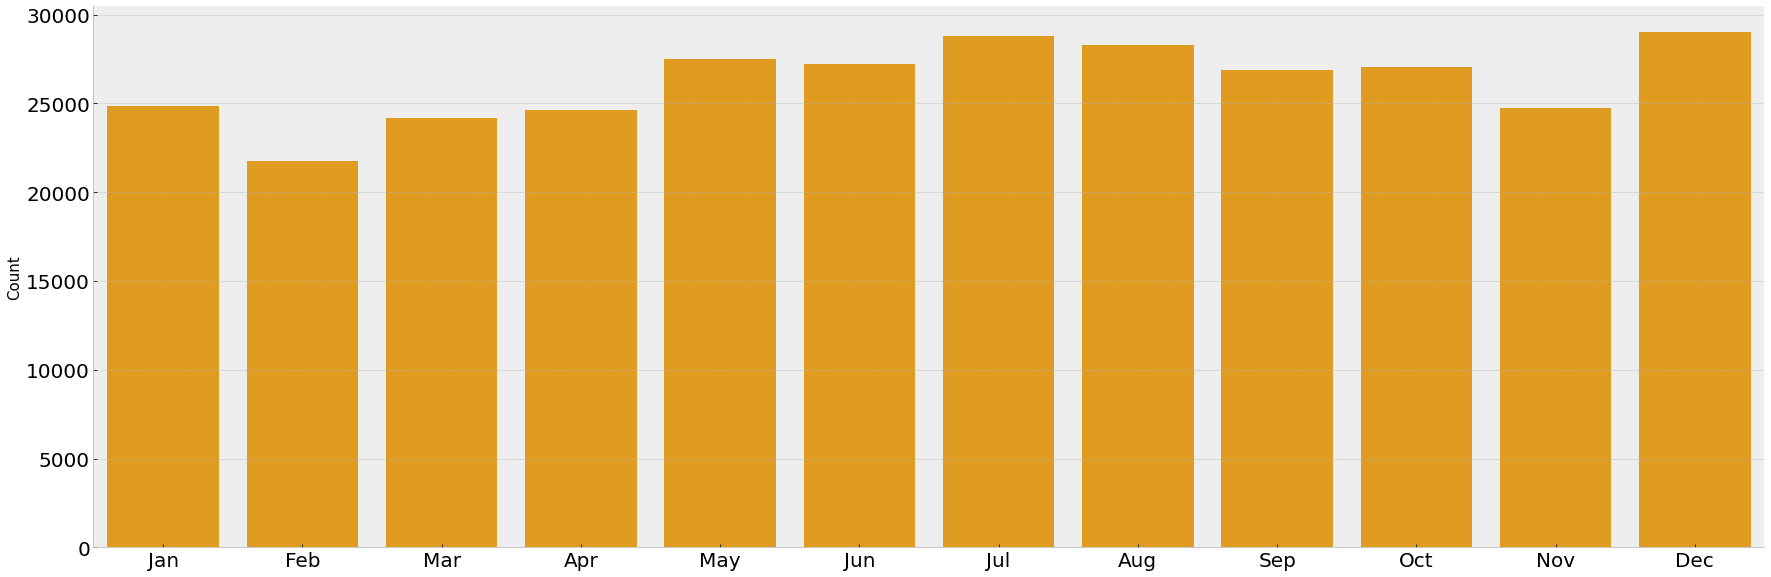

In [35]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
graph = sns.catplot(x='Month',
           kind='count',
            height=8, 
            aspect=3,
            color='Orange',
           data=df)
plt.xticks(np.arange(12), months, size=20)
plt.yticks(size=20)
plt.xlabel('')
plt.ylabel('Count', fontsize=15)

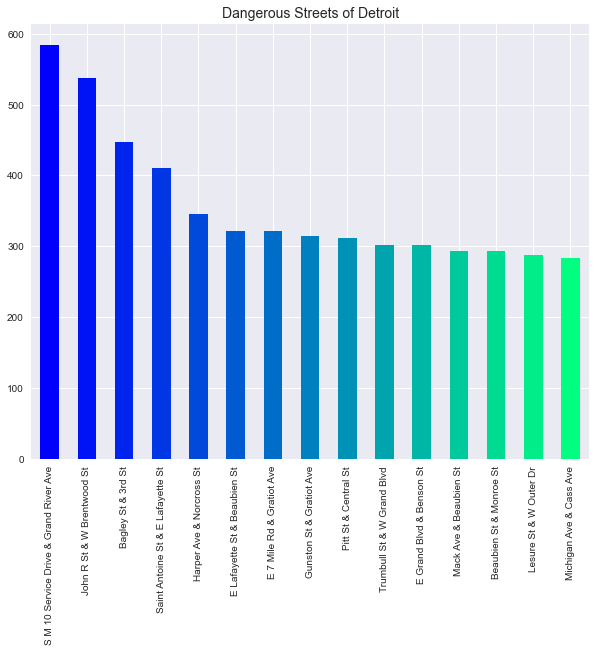

In [37]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('seaborn')

color = plt.cm.winter(np.linspace(0, 1, 15))
df['Address'].value_counts().head(15).plot.bar(color = color, figsize = (10, 8))

plt.title('Dangerous Streets of Detroit',fontsize = 14)

plt.xticks(rotation = 90)
plt.show()

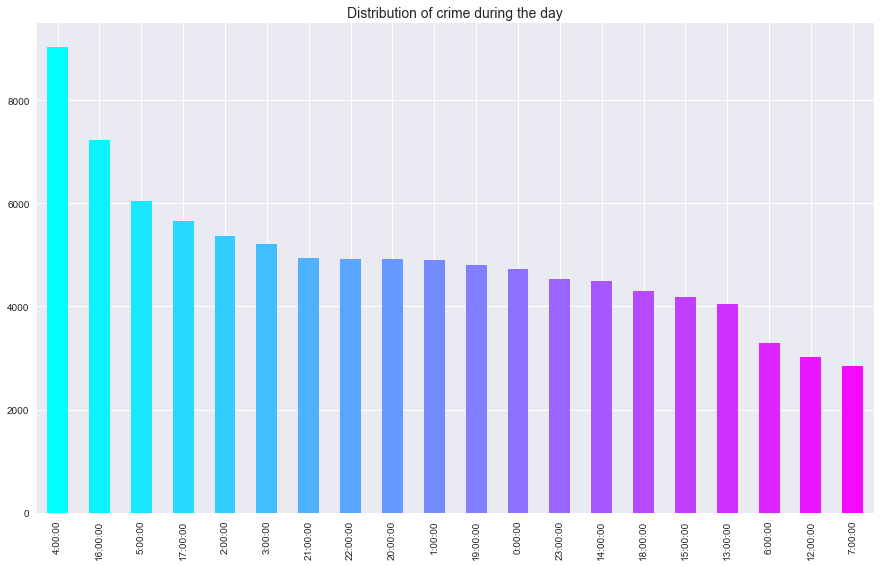

In [38]:
color = plt.cm.cool(np.linspace(0, 5, 100))
df['Time'].value_counts().head(20).plot.bar(color = color, figsize = (15, 9))

plt.title('Distribution of crime during the day', fontsize = 14)
plt.show()

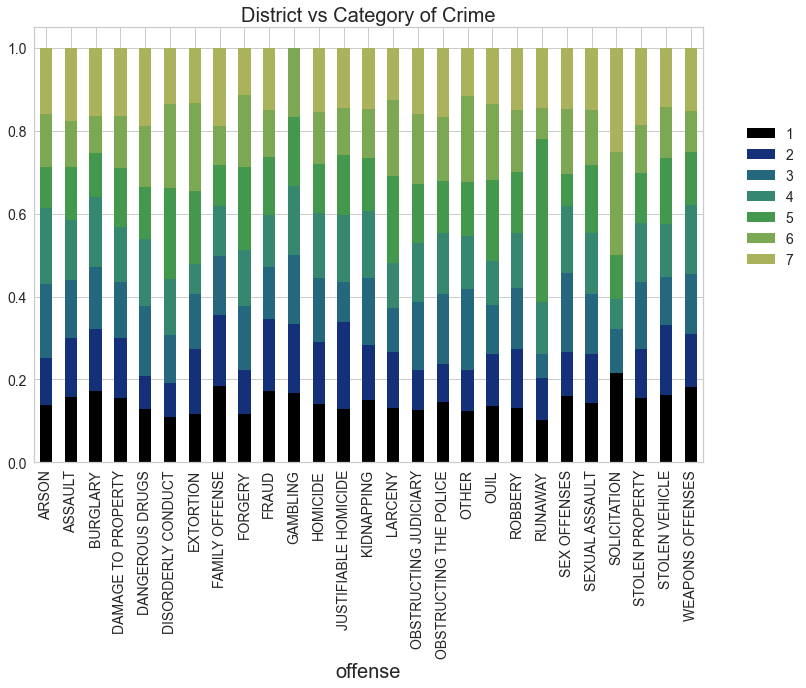

In [423]:
data = pd.crosstab(df['Offense'], df['Council_dist'])
color = plt.cm.gist_earth(np.linspace(0, 1, 10))

data.div(data.sum(1).astype(float), axis = 0).plot.bar(stacked = True, color = color, figsize = (12, 8))
plt.title('District vs Category of Crime', fontweight = 30, fontsize = 20)
plt.legend(loc='upper center', fontsize = 14, bbox_to_anchor=(1.10, 0.8), shadow=True, ncol=1)
plt.xlabel('offense', fontsize=20)
plt.ylabel('')
plt.xticks(size=14, rotation = 90)
plt.yticks(size=14)
plt.show()

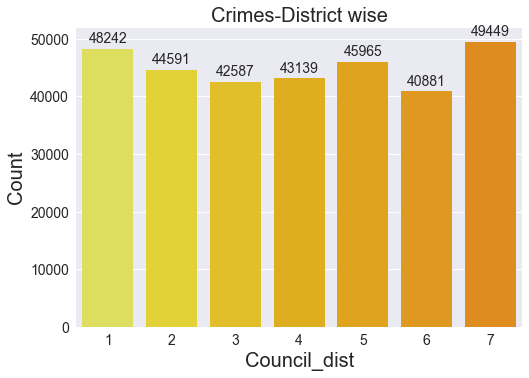

In [40]:
graph = sns.countplot(data=df, x='Council_dist', palette="Wistia")

for p in graph.patches:
    graph.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )


plt.xlabel('Council_dist', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Crimes-District wise', fontweight = 30, fontsize = 20)
plt.xticks(size=14, rotation = 0)
plt.yticks(size=14)
plt.show()

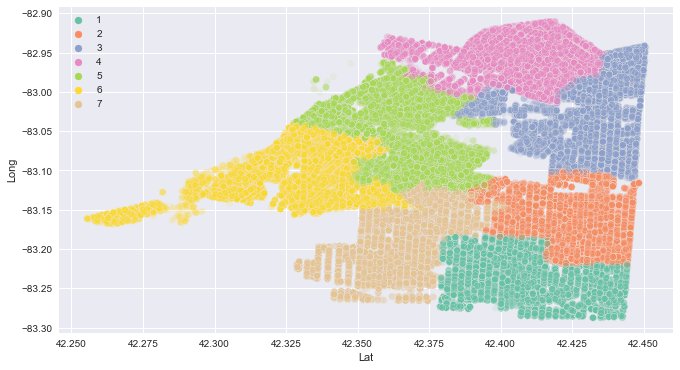

In [43]:
df.Lat.replace(-1, None, inplace=True)
df.Long.replace(-1, None, inplace=True)

plt.rcParams["figure.figsize"] = 21,11

plt.subplots(figsize=(11,6))
sns.scatterplot(x='Lat',
                y='Long',
                palette='Set2',
                hue='Council_dist',
                alpha=0.1,
                data=df)
plt.legend(loc=2)

In [23]:
dist_1=df.loc[df.Council_dist==6][df.Offense_code==2201][['Lat','Long']]
dist_1.Lat.fillna(0, inplace = True)
dist_1.Long.fillna(0, inplace = True) 

map_1=folium.Map(location=[42.35339333,-83.12672441], 
                 tiles = "OpenStreetMap",
                zoom_start=11)

folium.CircleMarker([42.33498839, -83.15450925],
                        radius=100,
                        fill_color="#b22222",
                        popup='Crimes',
                        color='red',
                       ).add_to(map_1)

HeatMap(data=dist_1, radius=16).add_to(map_1)

map_1

<ipython-input-23-3cee2a20e501>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dist_1=df.loc[df.Council_dist==6][df.Offense_code==2201][['Lat','Long']]


In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314854 entries, 0 to 314853
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Address         314854 non-null  object 
 1   Description     314854 non-null  object 
 2   Offense         314854 non-null  object 
 3   Offense_code    314854 non-null  int64  
 4   Report_time     314854 non-null  object 
 5   Time            314854 non-null  object 
 6   Day_number      314854 non-null  int64  
 7   Day_of_week     314854 non-null  object 
 8   Hour            314854 non-null  int64  
 9   Month           314854 non-null  int64  
 10  Year            314854 non-null  int64  
 11  Date            314854 non-null  object 
 12  Scout_car_area  314854 non-null  object 
 13  Precinct        314854 non-null  object 
 14  Block_id        314854 non-null  float64
 15  Neighborhood    314854 non-null  object 
 16  Council_dist    314854 non-null  int64  
 17  Zip       

In [59]:
# Convert Categorical Attributes to Numerical
df['Scout_car_area'] = pd.factorize(df["Scout_car_area"])[0]
df['Precinct'] = pd.factorize(df["Precinct"])[0]
df['Description'] = pd.factorize(df["Description"])[0]
df['Neighborhood'] = pd.factorize(df["Neighborhood"])[0]
df['Address'] = pd.factorize(df["Address"])[0] 

In [60]:
Target = 'Offense'
print('Target:', Target)

Target: Offense


In [61]:
Classes = df['Offense'].unique()
Classes

array(['ROBBERY', 'LARCENY', 'BURGLARY', 'ARSON', 'FRAUD',
       'STOLEN VEHICLE', 'DAMAGE TO PROPERTY', 'OTHER', 'RUNAWAY', 'OUIL',
       'EXTORTION', 'ASSAULT', 'WEAPONS OFFENSES', 'SEX OFFENSES',
       'SEXUAL ASSAULT', 'FAMILY OFFENSE', 'DANGEROUS DRUGS',
       'KIDNAPPING', 'HOMICIDE', 'STOLEN PROPERTY', 'FORGERY',
       'DISORDERLY CONDUCT', 'OBSTRUCTING JUDICIARY', 'SOLICITATION',
       'OBSTRUCTING THE POLICE', 'JUSTIFIABLE HOMICIDE', 'GAMBLING'],
      dtype=object)

In [62]:
df['Offense'] = pd.factorize(df["Offense"])[0] 
df['Offense'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=int64)

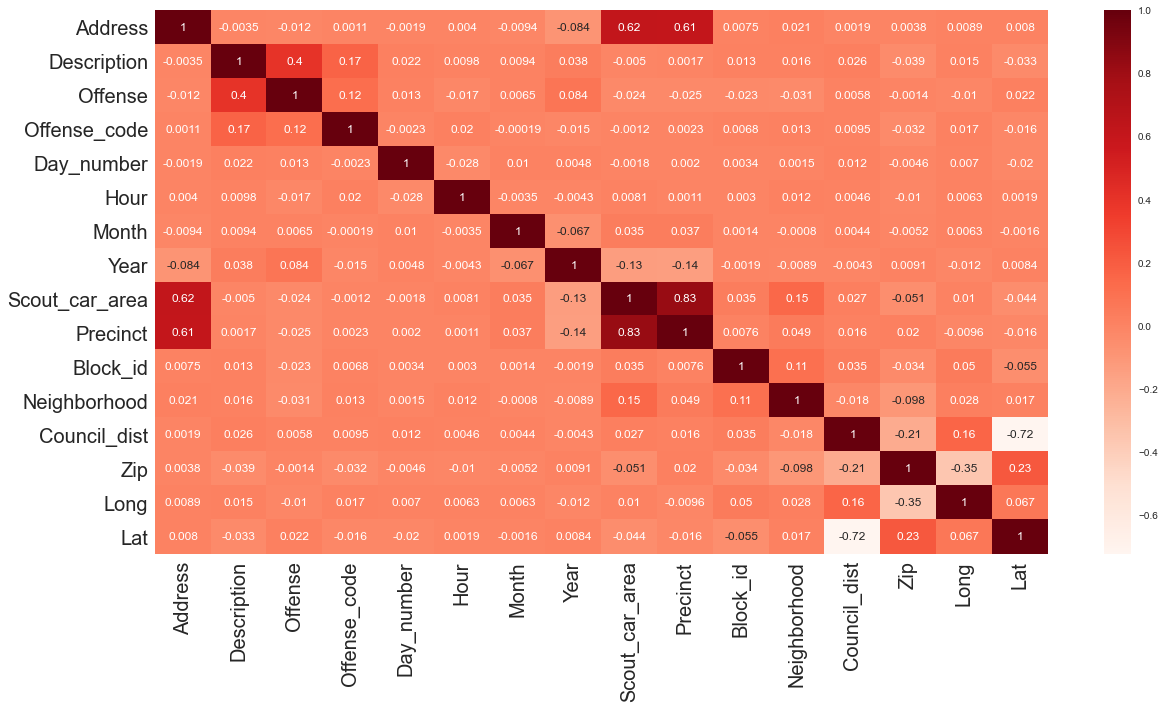

In [17]:
X_fs = df.drop(['Offense'], axis=1)
Y_fs = df['Offense']

#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.xticks(size=20, rotation=90)
plt.yticks(size=20)
plt.show()

In [63]:
Features = ["Offense_code", "Day_number", "Hour", "Month","Neighborhood","Council_dist"]
print('Full Features: ', Features)

Full Features:  ['Offense_code', 'Day_number', 'Hour', 'Month', 'Neighborhood', 'Council_dist']


In [64]:
#Spliting dataset into Train Set & Test Set
x, y = train_test_split(df, 
                        test_size = 0.2, 
                        train_size = 0.8, 
                        random_state= 3)

x1 = x[Features]    #Features to train
x2 = x[Target]      #Target Class to train
y1 = y[Features]    #Features to test
y2 = y[Target]      #Target Class to test

print('Feature Set Used    : ', Features)
print('Target Class        : ', Target)
print('Training Set Size   : ', x.shape)
print('Test Set Size       : ', y.shape)

Feature Set Used    :  ['Offense_code', 'Day_number', 'Hour', 'Month', 'Neighborhood', 'Council_dist']
Target Class        :  Offense
Training Set Size   :  (251883, 20)
Test Set Size       :  (62971, 20)


In [44]:
from sklearn.linear_model import LogisticRegression

In [54]:
lr_model = LogisticRegression(random_state = 5, solver = 'liblinear', multi_class='auto', max_iter=100)

lr_model.fit(X=x1,
             y=x2)

result = lr_model.predict(y[Features])

In [70]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Logistic Regression Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

NameError: name 'result' is not defined

D:\Anaconda\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


================= Classification Report =================

                        precision    recall  f1-score   support

               ROBBERY       0.00      0.00      0.00      1758
               LARCENY       0.31      0.85      0.45      9687
              BURGLARY       0.35      0.09      0.14      5574
                 ARSON       0.00      0.00      0.00       629
                 FRAUD       0.22      0.03      0.06      5077
        STOLEN VEHICLE       0.32      0.10      0.16      5214
    DAMAGE TO PROPERTY       0.30      0.40      0.34      7769
                 OTHER       0.73      0.24      0.36       600
               RUNAWAY       0.00      0.00      0.00       278
                  OUIL       0.00      0.00      0.00       554
             EXTORTION       0.00      0.00      0.00        32
               ASSAULT       0.85      1.00      0.92     17832
      WEAPONS OFFENSES       0.27      0.15      0.20      1700
          SEX OFFENSES       0.00      0.00 

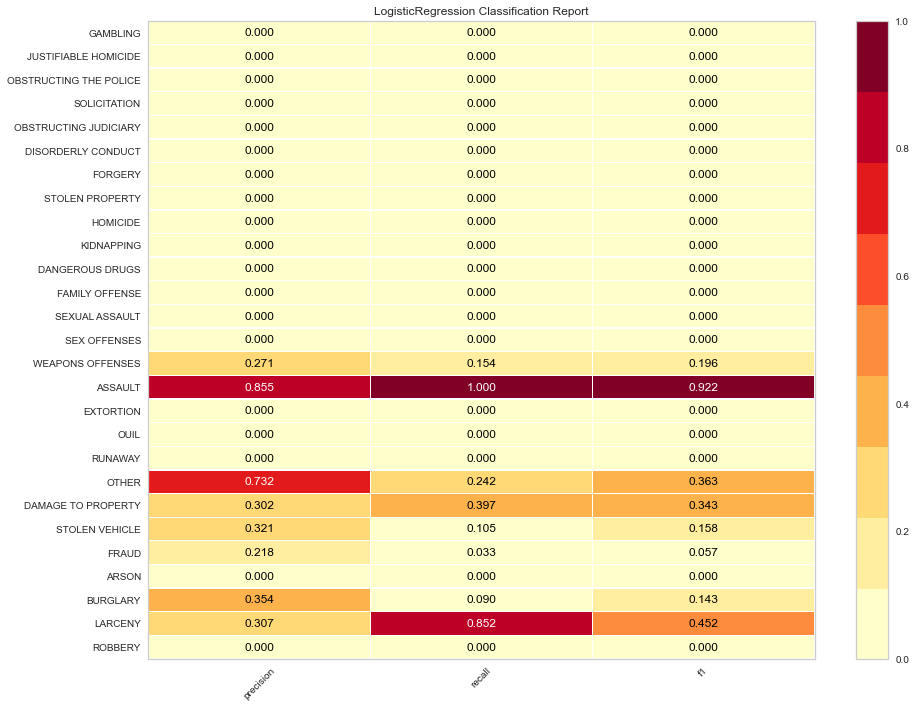

In [58]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(lr_model, size=(1000, 720), classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()  

In [101]:
# Random Forest
# Create Model with configuration
rf_model = RandomForestClassifier(n_estimators=100, # Number of trees
                                  min_samples_split = 30,
                                  bootstrap = True, 
                                  max_depth = 50, 
                                  min_samples_leaf = 25)

# Model Training
rf_model.fit(X=x1,
             y=x2)

# Prediction
result2 = rf_model.predict(y[Features])

In [111]:
# Model Evaluation
ac_sc2 = accuracy_score(y2, result2)
rc_sc2 = recall_score(y2, result2, average="weighted")
pr_sc2 = precision_score(y2, result2, average="weighted")
f1_sc2 = f1_score(y2, result2, average='micro')
confusion_m2 = confusion_matrix(y2, result2)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc2)
print("Recall      : ", rc_sc2)
print("Precision   : ", pr_sc2)
print("F1 Score    : ", f1_sc2)
print("Confusion Matrix: ")
print(confusion_m2)

========== Random Forest Results ==========
Accuracy    :  0.9621095424878119
Recall      :  0.9621095424878119
Precision   :  0.9625085971075227
F1 Score    :  0.9621095424878119
Confusion Matrix: 
[[ 1758     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [    0  9687     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [    0     0  5574     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [    0     0    79   550     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [    0     0     0     0  4992     0    52     0     0     0     0     0
      0     0     0     0    33     0     0     0  

D:\Anaconda\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


================= Classification Report =================

                        precision    recall  f1-score   support

               ROBBERY       1.00      1.00      1.00      1758
               LARCENY       1.00      1.00      1.00      9687
              BURGLARY       0.98      1.00      0.99      5574
                 ARSON       0.97      0.87      0.92       629
                 FRAUD       0.96      0.98      0.97      5077
        STOLEN VEHICLE       0.99      1.00      1.00      5214
    DAMAGE TO PROPERTY       0.93      1.00      0.97      7769
                 OTHER       0.80      0.55      0.65       600
               RUNAWAY       0.74      0.28      0.41       278
                  OUIL       0.82      0.43      0.57       554
             EXTORTION       0.00      0.00      0.00        32
               ASSAULT       1.00      1.00      1.00     17832
      WEAPONS OFFENSES       0.70      0.98      0.82      1700
          SEX OFFENSES       0.88      0.90 

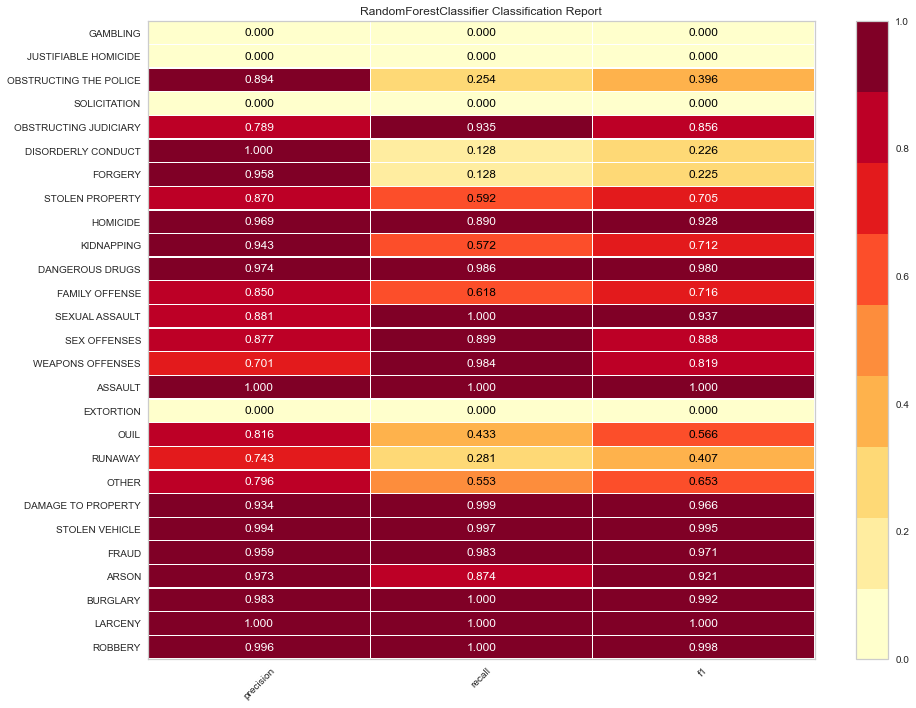

In [105]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(rf_model, size=(1000, 720), classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result2, target_names=target_names))

g = visualizer.poof()  

In [17]:
# NN 

nn_model = MLPClassifier(solver='adam', 
                         alpha=1e-5,
                         hidden_layer_sizes=(150), 
                         random_state=1,
                         max_iter=300                         
                        )

# Model Training
nn_model.fit(X=x1,
             y=x2)

# Prediction
result1 = nn_model.predict(y[Features]) 

In [18]:
# Model Evaluation
ac_sc1 = accuracy_score(y2, result1)
rc_sc1 = recall_score(y2, result1, average="weighted")
pr_sc1 = precision_score(y2, result1, average="weighted")
f1_sc1 = f1_score(y2, result1, average='micro')
confusion_m1 = confusion_matrix(y2, result1)

print("========== Neural Network Results ==========")
print("Accuracy    : ", ac_sc1)
print("Recall      : ", rc_sc1)
print("Precision   : ", pr_sc1)
print("F1 Score    : ", f1_sc1)
print("Confusion Matrix: ")
print(confusion_m1)

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========== Neural Network Results ==========
Accuracy    :  0.784948627145829
Recall      :  0.784948627145829
Precision   :  0.732512978942627
F1 Score    :  0.784948627145829
Confusion Matrix: 
[[ 1758     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [    0  9513   169     0     0     5     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [    0    74  5500     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [    0     0   628     0     0     0     0     0     0     0     0     1
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [    0    76     0     0  3195   979   827     0     0     0     0     0
      0     0     0     0     0     0     0     0     

D:\Anaconda\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


================= Classification Report =================

                        precision    recall  f1-score   support

               ROBBERY       0.66      1.00      0.80      1758
               LARCENY       0.65      0.98      0.78      9687
              BURGLARY       0.87      0.99      0.92      5574
                 ARSON       0.00      0.00      0.00       629
                 FRAUD       0.92      0.63      0.75      5077
        STOLEN VEHICLE       0.45      0.17      0.25      5214
    DAMAGE TO PROPERTY       0.78      0.97      0.87      7769
                 OTHER       0.66      0.70      0.68       600
               RUNAWAY       0.00      0.00      0.00       278
                  OUIL       0.00      0.00      0.00       554
             EXTORTION       0.00      0.00      0.00        32
               ASSAULT       1.00      1.00      1.00     17832
      WEAPONS OFFENSES       0.47      0.97      0.64      1700
          SEX OFFENSES       0.42      0.35 

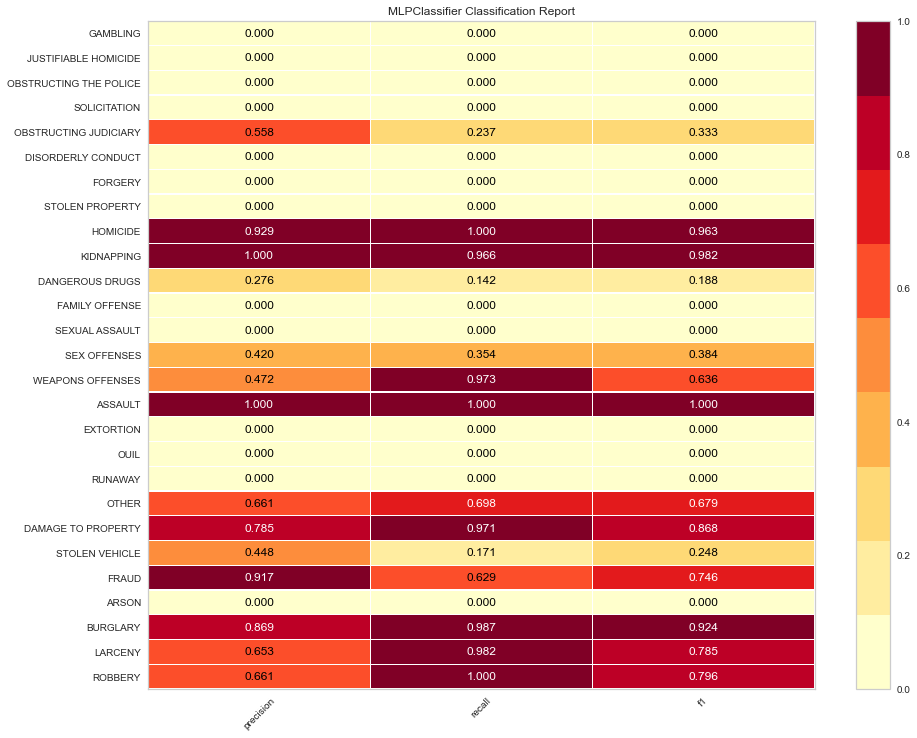

In [24]:
target_names = Classes
visualizer = ClassificationReport(nn_model, size=(1000,750), classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result1, target_names=target_names))

g = visualizer.poof() 

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [67]:
DT_gini_model = DecisionTreeClassifier(criterion = "gini", random_state = 5,
                               max_depth=5, min_samples_leaf=8)


DT_gini_model.fit(X=x1,
             y=x2)

result3 = DT_gini_model.predict(y[Features])

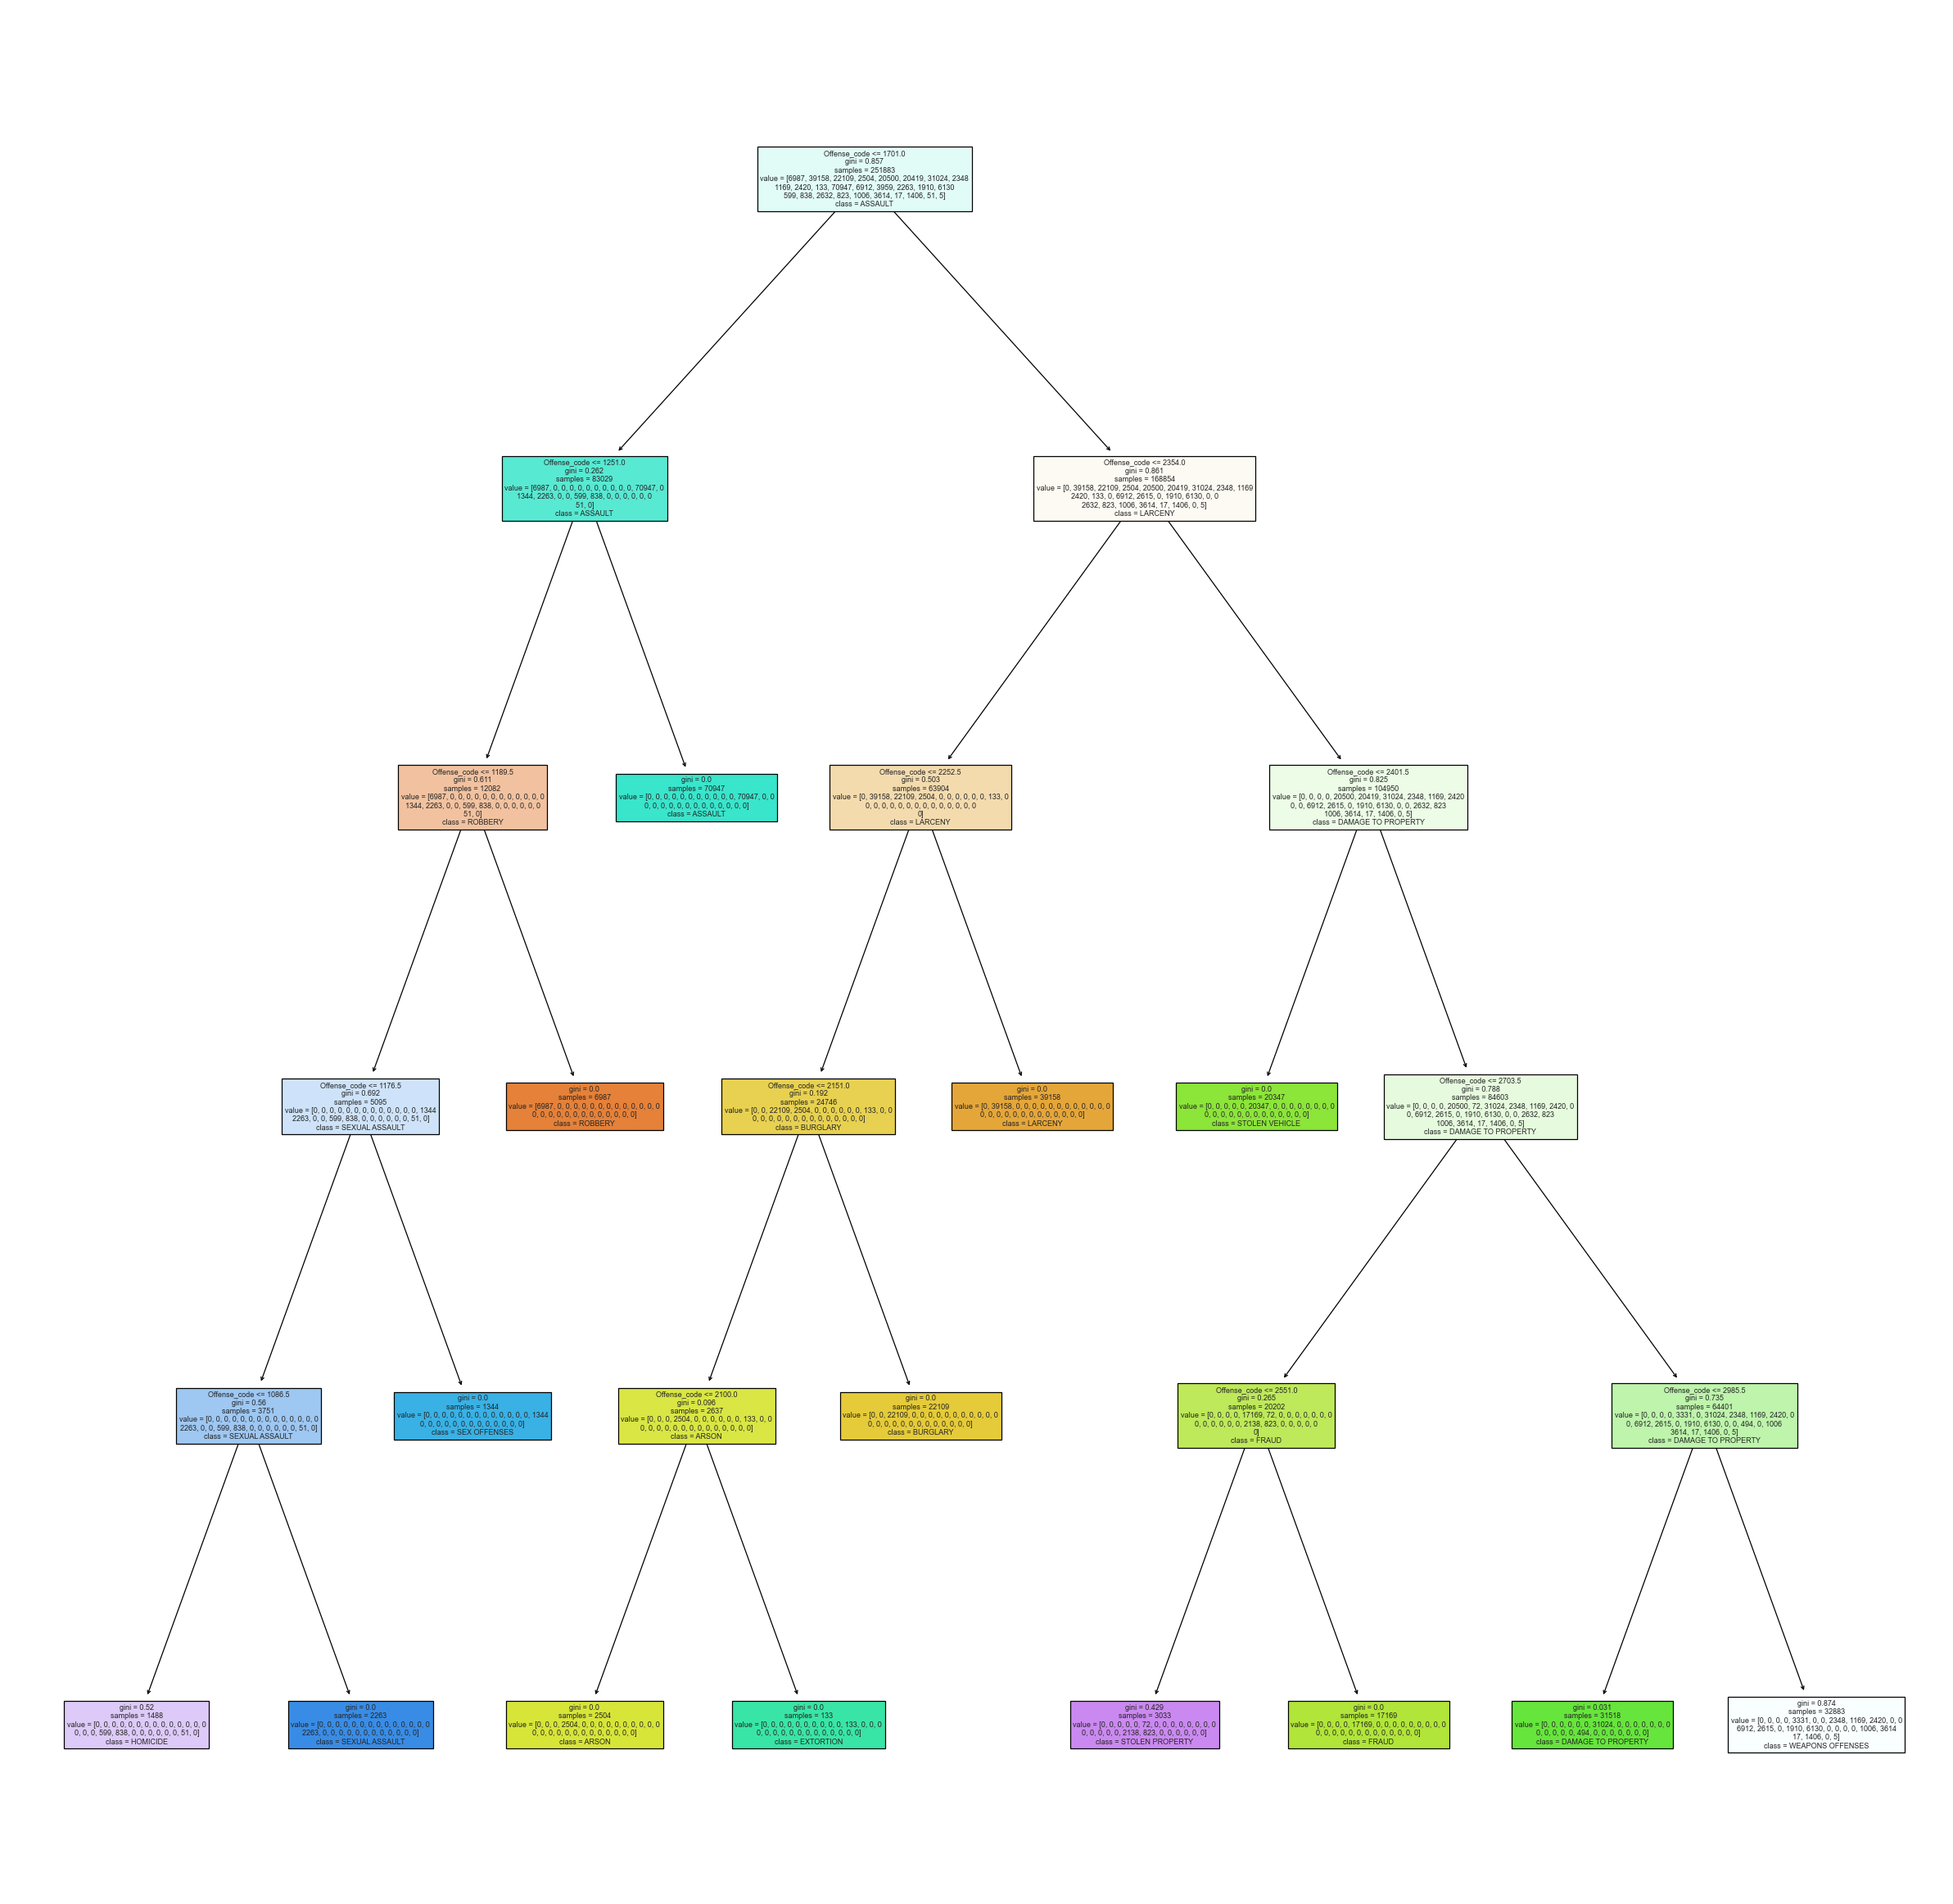

In [51]:
target_names=Classes
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(DT_gini_model,
               feature_names = Features, 
               class_names=target_names,
               filled = True);

In [68]:
# Model Evaluation
ac_sc3 = accuracy_score(y2, result3)
rc_sc3 = recall_score(y2, result3, average="weighted")
pr_sc3 = precision_score(y2, result3, average="weighted",zero_division='warn')
f1_sc3 = f1_score(y2, result3, average='micro')
confusion_m3 = confusion_matrix(y2, result3)

print("========== Decision Tree Results ==========")
print("Accuracy    : ", ac_sc3)
print("Recall      : ", rc_sc3)
print("Precision   : ", pr_sc3)
print("F1 Score    : ", f1_sc3)
print("Confusion Matrix: ")
print(confusion_m3)

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========== Decision Tree Results ==========
Accuracy    :  0.8905210334916073
Recall      :  0.8905210334916073
Precision   :  0.888330775253964
F1 Score    :  0.8905210334916074
Confusion Matrix: 
[[ 1758     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [    0  9687     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [    0     0  5574     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [    0     0     0   629     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [    0     0     0     0  4251     0     0     0     0     0     0     0
    826     0     0     0     0     0     0     0   

D:\Anaconda\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


================= Classification Report =================

                        precision    recall  f1-score   support

               ROBBERY       1.00      1.00      1.00      1758
               LARCENY       1.00      1.00      1.00      9687
              BURGLARY       1.00      1.00      1.00      5574
                 ARSON       1.00      1.00      1.00       629
                 FRAUD       1.00      0.84      0.91      5077
        STOLEN VEHICLE       1.00      1.00      1.00      5214
    DAMAGE TO PROPERTY       0.99      1.00      0.99      7769
                 OTHER       0.00      0.00      0.00       600
               RUNAWAY       0.00      0.00      0.00       278
                  OUIL       0.00      0.00      0.00       554
             EXTORTION       1.00      1.00      1.00        32
               ASSAULT       1.00      1.00      1.00     17832
      WEAPONS OFFENSES       0.21      1.00      0.35      1700
          SEX OFFENSES       1.00      0.35 

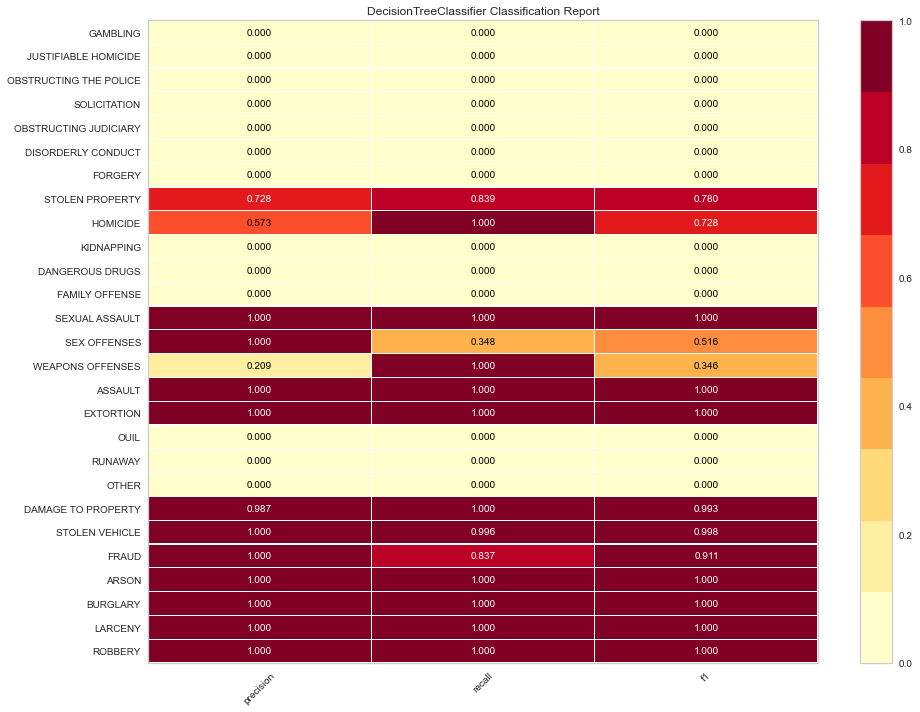

In [69]:
target_names = Classes
visualizer = ClassificationReport(DT_gini_model, size=(1000,720), classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result3, target_names=target_names))

g = visualizer.poof()

In [21]:
# K-Nearest Neighbors
# Create Model with configuration 
knn_model = KNeighborsClassifier(n_neighbors=3)

# Model Training
knn_model.fit(X=x1,
             y=x2)

# Prediction
result4 = knn_model.predict(y[Features]) 

In [22]:
# Model Evaluation
ac_sc4 = accuracy_score(y2, result4)
rc_sc4 = recall_score(y2, result4, average="weighted")
pr_sc4 = precision_score(y2, result4, average="weighted")
f1_sc4 = f1_score(y2, result4, average='micro')
confusion_m4 = confusion_matrix(y2, result4)

print("========== K-Nearest Neighbors Results ==========")
print("Accuracy    : ", ac_sc4)
print("Recall      : ", rc_sc4)
print("Precision   : ", pr_sc4)
print("F1 Score    : ", f1_sc4)
print("Confusion Matrix: ")
print(confusion_m4)

========== K-Nearest Neighbors Results ==========
Accuracy    :  0.9907100093693922
Recall      :  0.9907100093693922
Precision   :  0.9893564665142717
F1 Score    :  0.9907100093693922
Confusion Matrix: 
[[ 1758     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [    0  9687     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [    0     0  5574     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [    0     0     0   626     0     0     0     0     0     0     3     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [    0     0     0     0  5077     0     0     0     0     0     0     0
      0     0     0     0     0     0     0  

D:\Anaconda\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


================= Classification Report =================

                        precision    recall  f1-score   support

               ROBBERY       1.00      1.00      1.00      1758
               LARCENY       1.00      1.00      1.00      9687
              BURGLARY       1.00      1.00      1.00      5574
                 ARSON       0.96      1.00      0.98       629
                 FRAUD       1.00      1.00      1.00      5077
        STOLEN VEHICLE       0.92      0.99      0.95      5214
    DAMAGE TO PROPERTY       1.00      1.00      1.00      7769
                 OTHER       1.00      1.00      1.00       600
               RUNAWAY       1.00      1.00      1.00       278
                  OUIL       1.00      1.00      1.00       554
             EXTORTION       0.50      0.09      0.16        32
               ASSAULT       1.00      1.00      1.00     17832
      WEAPONS OFFENSES       1.00      1.00      1.00      1700
          SEX OFFENSES       0.98      0.99 

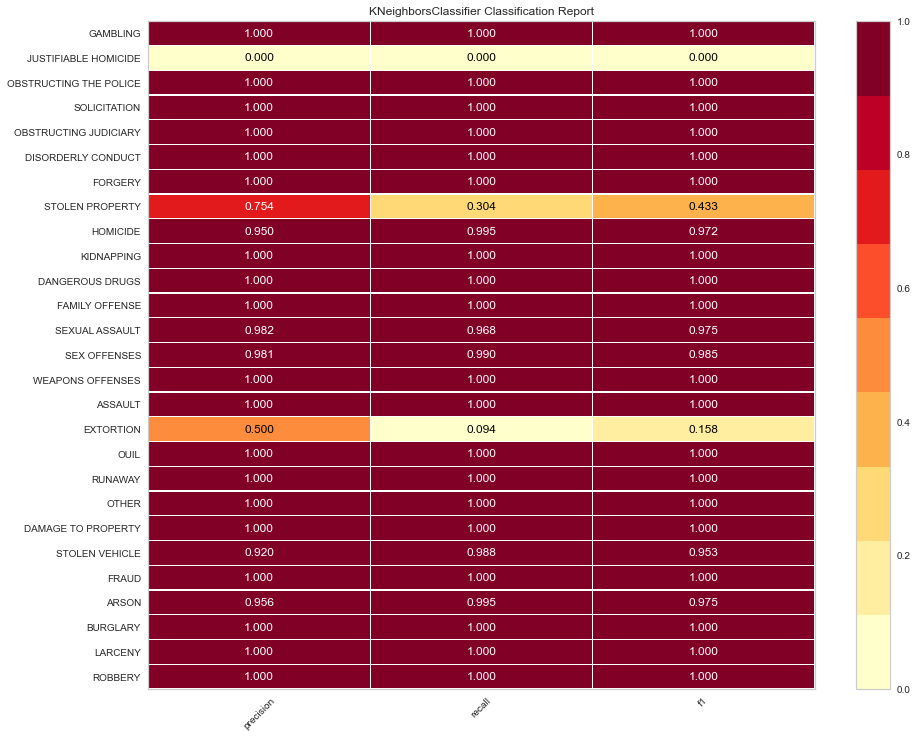

In [24]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(knn_model, size=(1000,750), classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result4, target_names=target_names))

g = visualizer.poof()

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

In [21]:
#Gradient Boosting
# Create Model with configuration 
gbc_model = GradientBoostingClassifier(learning_rate=0.1, n_estimators = 70, random_state = 42)

# Model Training
gbc_model.fit(X=x1,
             y=x2)

# Prediction
result5 = gbc_model.predict(y[Features]) 

In [22]:
# Model Evaluation
ac_sc5 = accuracy_score(y2, result5)
rc_sc5 = recall_score(y2, result5, average="weighted")
pr_sc5 = precision_score(y2, result5, average="weighted")
f1_sc5 = f1_score(y2, result5, average='micro')
confusion_m5 = confusion_matrix(y2, result5)

print("============= Gradient Boosting Results =============")
print("Accuracy    : ", ac_sc5)
print("Recall      : ", rc_sc5)
print("Precision   : ", pr_sc5)
print("F1 Score    : ", f1_sc5)
print("Confusion Matrix: ")
print(confusion_m5)

============= Gradient Boosting Results =============
Accuracy    :  1.0
Recall      :  1.0
Precision   :  1.0
F1 Score    :  1.0
Confusion Matrix: 
[[ 1758     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [    0  9687     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [    0     0  5574     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [    0     0     0   629     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [    0     0     0     0  5077     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [    

D:\Anaconda\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


================= Classification Report =================

                        precision    recall  f1-score   support

               ROBBERY       1.00      1.00      1.00      1758
               LARCENY       1.00      1.00      1.00      9687
              BURGLARY       1.00      1.00      1.00      5574
                 ARSON       1.00      1.00      1.00       629
                 FRAUD       1.00      1.00      1.00      5077
        STOLEN VEHICLE       1.00      1.00      1.00      5214
    DAMAGE TO PROPERTY       1.00      1.00      1.00      7769
                 OTHER       1.00      1.00      1.00       600
               RUNAWAY       1.00      1.00      1.00       278
                  OUIL       1.00      1.00      1.00       554
             EXTORTION       1.00      1.00      1.00        32
               ASSAULT       1.00      1.00      1.00     17832
      WEAPONS OFFENSES       1.00      1.00      1.00      1700
          SEX OFFENSES       1.00      1.00 

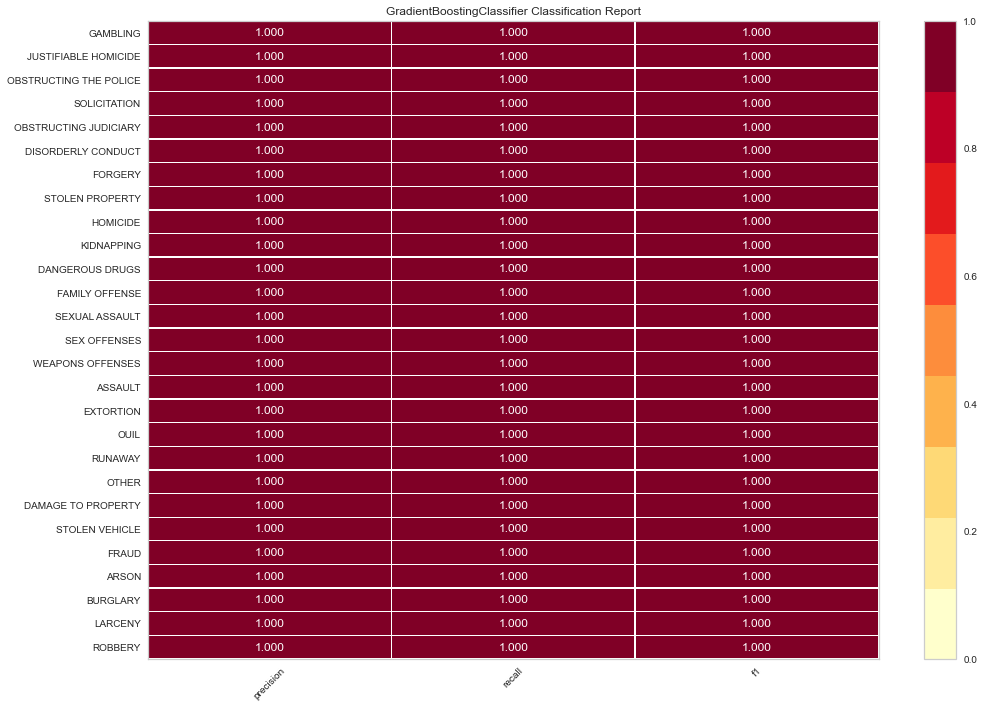

In [23]:
target_names = Classes
visualizer = ClassificationReport(gbc_model,size=(1080, 720), classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result5, target_names=target_names))

g = visualizer.poof()